In [210]:
#!pip install pygam
!pip install matplotlib-label-lines

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
# https://openalex.org/

import pyalex
pyalex.config.email = "maximilian.noichl@uni-bamberg.de"

from tqdm.auto import tqdm

from compress_pickle import dump, load
from urllib.parse import urlparse, parse_qs
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
from itertools import chain
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

import pandas as pd
pd.set_option('display.max_columns', None)


Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

In [7]:
merged_df = pd.read_csv('intermediate_datasets/merged_data_OA_and_filtered_retractions.csv')
import ast
merged_df['counts_by_year'] = merged_df['counts_by_year'].apply(ast.literal_eval)
merged_df['authorships'] = merged_df['authorships'].apply(ast.literal_eval)
merged_df = merged_df[merged_df['abstract'].str.len() >= 20]

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/2608473962.py:1: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('intermediate_datasets/merged_data_OA_and_filtered_retractions.csv')


In [8]:
merged_df = merged_df[merged_df['is_retracted'] == True]


In [9]:
merged_df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,Unnamed: 20,retraction_date_column,publication_date_column,time_to_retraction,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,fulltext_origin,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,is_authors_truncated,abstract,parsed_publication,journal_id
2,61512.0,Purple Sweet Potato Color Attenuates Kidney Da...,(BLS) Biochemistry;(BLS) Genetics;(BLS) Toxico...,Key Laboratory for Biotechnology on Medicinal ...,Oxidative Medicine and Cellular Longevity,Hindawi,China,Gui-Hong Zheng;Qun Shan;Jing-Jing Mu;Yong-Jian...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,10/18/2023 0:00,10.1155/2023/9850954,37886702.0,1/21/2019 0:00,10.1155/2019/5189819,30805082.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,NaN,2023-10-18,2019-01-21,1731.0,https://openalex.org/W2910476797,10.1155/2019/5189819,Purple Sweet Potato Color Attenuates Kidney Da...,Purple Sweet Potato Color Attenuates Kidney Da...,2019,2019-01-21,{'openalex': 'https://openalex.org/W2910476797...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,"['crossref', 'doaj', 'pubmed']","{'is_oa': True, 'oa_status': 'gold', 'oa_url':...","[{'author_position': 'first', 'author': {'id':...",[],1,2,"['https://openalex.org/A5100656521', 'https://...","['https://openalex.org/I118574674', 'https://o...","{'value': 2300, 'currency': 'USD', 'value_usd'...","{'value': 2300, 'currency': 'USD', 'value_usd'...",2.120,True,pdf,17,"{'value': 0.744007, 'is_in_top_1_percent': Fal...","{'min': 90, 'max': 91}","{'volume': '2019', 'issue': None, 'first_page'...",True,False,"{'id': 'https://openalex.org/T13505', 'display...","[{'id': 'https://openalex.org/T13505', 'displa...",[],"[{'id': 'https://openalex.org/C2780091579', 'w...","[{'descriptor_ui': 'D027723', 'descriptor_name...",5,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.48, 'display_name': 'Good health ...",[{'funder': 'https://openalex.org/F4320321605'...,[],[],44,"['https://openalex.org/W1792501638', 'https://...","['https://openalex.org/W4402125960', 'https://...","{'Our': [0, 56], 'preliminary': [1], 'data': [...",NaN,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 4}, {'year':...",2025-02-20T14:19:43.596162,2019-01-25,NaN,Our preliminary data showed that VEGFR2 upregu...,Oxidative Medicine and Cellular Longevity,https://openalex.org/S20935308
3,61457.0,Improved Multiview Decomposition for Single-Im...,(B/T) Computer Science;(B/T) Data Science;(B/T...,School of Physics and Mechanical and Electroni...,Wireless Communications and Mobile Computing,Hindawi,China,Jiansheng Peng;Kui Fu;Qingjin Wei;Yong Qin;Qiw...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,10/18/2023 0:00,10.1155/2023/9858963,0.0,12/28/2020 0:00,10.1155/2020/8871082,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,NaN,2023-10-18,2020-12-28,1024.0,https://openalex.org/W3115123560,10.1155/2020/8871082,Improved Multiview Decomposition for Single-Im...,Improved Multiview Decomposition for Single-Im...,2020,2020-12-26,{'openalex'

In [118]:
ast.literal_eval(merged_df['primary_location'].iloc[0])

{'is_oa': True,
 'landing_page_url': 'https://doi.org/10.1155/2019/5189819',
 'pdf_url': None,
 'source': {'id': 'https://openalex.org/S20935308',
  'display_name': 'Oxidative Medicine and Cellular Longevity',
  'issn_l': '1942-0994',
  'issn': ['1942-0994', '1942-0900'],
  'is_oa': True,
  'is_in_doaj': False,
  'is_indexed_in_scopus': True,
  'is_core': True,
  'host_organization': 'https://openalex.org/P4310319869',
  'host_organization_name': 'Hindawi Publishing Corporation',
  'host_organization_lineage': ['https://openalex.org/P4310319869'],
  'host_organization_lineage_names': ['Hindawi Publishing Corporation'],
  'type': 'journal'},
 'license': None,
 'license_id': None,
 'version': 'publishedVersion',
 'is_accepted': True,
 'is_published': True}

In [12]:



def openalex_url_to_pyalex_query(url):
    """
    Convert an OpenAlex search URL to a pyalex query.
    
    Args:
    url (str): The OpenAlex search URL.
    
    Returns:
    tuple: (Works object, dict of parameters)
    """
    
    # Parse the URL 
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    
    # Initialize the Works object
    query = Works()
    
    # Handle filters
    if 'filter' in query_params:
        filters = query_params['filter'][0].split(',')
        for f in filters:
            if ':' in f:
                key, value = f.split(':', 1)
                if key == 'default.search':
                    query = query.search(value)
                else:
                    query = query.filter(**{key: value})
    
    # Handle sort
    if 'sort' in query_params:
        sort_params = query_params['sort'][0].split(',')
        for s in sort_params:
            if s.startswith('-'):
                query = query.sort(**{s[1:]: 'desc'})
            else:
                query = query.sort(**{s: 'asc'})
    return query



    


# citing_records = []

# for ix, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    
    
#     query = openalex_url_to_pyalex_query(row['cited_by_api_url'])
#     query_length = query.count()
#     print(f'Requesting {query_length} entries citing {row["display_name"]}...')
    
#     for i, record in enumerate(chain(*query.paginate(per_page=50,n_max=None))):
#         record['id_of_citing_paper'] = row['id']
#         citing_records.append(record)
        
# citing_records_df = pd.DataFrame(citing_records)
# display(citing_records_df)


citing_records = []

for ix, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    max_retries = 5
    retry_count = 0
    success = False
    
    while not success and retry_count < max_retries:
        try:
            query = openalex_url_to_pyalex_query(row['cited_by_api_url'])
            query_length = query.count()
            if ix % 10 == 0:
                print(f'Requesting {query_length} entries citing {row["display_name"]}...')
            
            for i, record in enumerate(chain(*query.paginate(per_page=50,n_max=None))):
                record['id_of_citing_paper'] = row['id']
                citing_records.append(record)
            success = True
            
        except Exception as e:
            retry_count += 1
            if retry_count < max_retries:
                sleep_time = 2 ** retry_count  # Exponential backoff
                print(f"Request failed. Retrying in {sleep_time} seconds... (Attempt {retry_count} of {max_retries})")
                time.sleep(sleep_time)
            else:
                print(f"Max retries exceeded for {row['display_name']}. Error: {str(e)}")
                
citing_records_df = pd.DataFrame(citing_records)
display(citing_records_df)



  0%|          | 0/11986 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [248]:
#citing_records_df.to_pickle('intermediate_datasets/records_that cite_merged_df.pkl')

citing_records_df = pd.read_pickle('intermediate_datasets/records_that cite_merged_df.pkl')


In [249]:
def invert_abstract(inv_index):
    """Reconstruct abstract from inverted index."""
    if inv_index is not None:
        l_inv = [(w, p) for w, pos in inv_index.items() for p in pos]
        return " ".join(map(lambda x: x[0], sorted(l_inv, key=lambda x: x[1])))
    else:
        return ' '

def get_pub(x):
    """Extract publication name and ID from record."""
    try:
        source = x['source']
        display_name = source['display_name']
        journal_id = source['id']
        if display_name not in ['parsed_publication','Deleted Journal']:
            return display_name, journal_id
        else:
            return ' ', None
    except:
        return ' ', None

def get_field(x):
    """Extract academic field from record."""
    try:
        field = x['primary_topic']['subfield']['display_name']
        if field is not None:
            return field
        else:
            return np.nan
    except:
        return np.nan

def process_records(records_df):
    """
    Convert OpenAlex records to a pandas DataFrame with processed fields.
    
    Args:
    records (list): List of OpenAlex record dictionaries
    
    Returns:
    pandas.DataFrame: Processed DataFrame with abstracts, publications, and titles
    """
    records_df['abstract'] = [invert_abstract(t) for t in records_df['abstract_inverted_index']]
    
    # Get both publication name and journal ID
    pub_info = [get_pub(x) for x in records_df['primary_location']]
    records_df['parsed_publication'] = [x[0] for x in pub_info]
    records_df['journal_id'] = [x[1] for x in pub_info]
    
    records_df['parsed_publication'] = records_df['parsed_publication'].fillna(' ')
    records_df['abstract'] = records_df['abstract'].fillna(' ')
    records_df['title'] = records_df['title'].fillna(' ')
    records_df = records_df[records_df['abstract'].str.len() >= 20]
    records_df = records_df.drop_duplicates(subset=['id']).reset_index(drop=True)
    records_df['doi'] = records_df['doi'].str.replace('https://doi.org/', '')
    return records_df 

citing_records_df = process_records(citing_records_df)


citing_records_df# = citing_records_df.sample(100000)

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,id_of_citing_paper,is_authors_truncated,abstract,parsed_publication,journal_id
0,https://openalex.org/W3126870425,10.1155/2021/6690539,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,2021,2021-02-02,{'openalex': 'https://openalex.org/W3126870425...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 13}, {'year'...",2025-02-13T13:56:57.739046,2021-02-15,https://openalex.org/W3101413762,NaN,There are many kinds of brain abnormalities th...,Applied Bionics and Biomechanics,https://openalex.org/S50311662
1,https://openalex.org/W4390840114,10.53759/0088/jbsha20240408,Advances and Challenges in Closed Loop Therape...,Advances and Challenges in Closed Loop Therape...,2024,2024-01-05,{'openalex': 'https://openalex.org/W4390840114...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 4}]",2025-02-12T07:25:56.432138,2024-01-14,https://openalex.org/W3101413762,NaN,The main objective of this paper is to develop...,Journal of Biomedical and Sustainable Healthca...,https://openalex.org/S4210204107
2,https://openalex.org/W3214137226,10.3390/sym13112178,Entropy as Measure of Brain Networks’ Complexi...,Entropy as Measure of Brain Networks’ Complexi...,2021,2021-11-15,{'openalex': 'https://openalex.org/W3214137226...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2025, 'cited_by_count': 1}, {'year':...",2025-02-21T02:14:46.348581,2021-11-22,https://openalex.org/W3101413762,NaN,Brain complexity can be revealed even through ...,Symmetry,https://openalex.org/S190787756
3,https://openalex.org/W4353052315,10.18280/ts.400104,Investigation of Epileptic Seizure Signatures ...,Investigation of Epileptic Seizure Signatures ...,2023,2023-02-28,{'openalex': 'https://openalex.org/W4353052315...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 3}, {'year':...",2025-02-02T17:51:48.935052,2023-03-23,https://openalex.org/W3101413762,NaN,Epilepsy is one of the earnest neurological di...,Traitement du signal,https://openalex.org/S120060627
4,https://openalex.org/W4388126405,10.1038/s41598-023-46113-z,Entropy in scalp EEG can be used as a preimpla...,Entropy in scalp EEG can be used as a preimpla...,2023,2023-11-01,{'openalex': 'https://openalex.org/W4388126405...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 5}]",2025-02-18T00:53:48.441322,2023-11-02,https://openalex.org/W3101413762,NaN,Vagus nerve stimulation (VNS) is a therapeutic...,Scientific Reports,https://openalex.org/S196734849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348197,https://openalex.org/W2566835621,10.1093/brain/aww295,Phospholipase A<sub>2</sub>-activating protein...,Phospholipase A<sub>2</sub>-activating protein...,2016,2016-10-31,{'openalex': 'https://openalex.org/W2566835621...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 2}, {'year':...",2025-02-14T02:59:19.112135,2017-01-06,https://openalex.org/W1903493012,NaN,Leukoencephalopathies are a group of white mat...,Brain,https://openalex.org/S118357697
348198,https://openalex.org/W2618985385,10.7150/ijbs.19714,PPARD is an Inhibitor of Cartilage Growth in E...,PPARD is an Inhibitor of Cartilage Growth in E...,2017,2017-01-01,{'openalex': 'https://open

In [28]:
#citing_records_df.to_pickle('intermediate_datasets/100k_sample_records_that_cite_merged_df.pkl')


In [13]:
import sentence_transformers

model = sentence_transformers.SentenceTransformer('m7n/discipline-tuned_specter_2_024')

merged_df_embeddings = model.encode(list(merged_df['abstract'])  , show_progress_bar=True, batch_size=64)

















Batches:   0%|          | 0/188 [00:00<?, ?it/s]

In [251]:
citing_records_df

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,id_of_citing_paper,is_authors_truncated,abstract,parsed_publication,journal_id
0,https://openalex.org/W3126870425,10.1155/2021/6690539,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,2021,2021-02-02,{'openalex': 'https://openalex.org/W3126870425...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 13}, {'year'...",2025-02-13T13:56:57.739046,2021-02-15,https://openalex.org/W3101413762,NaN,There are many kinds of brain abnormalities th...,Applied Bionics and Biomechanics,https://openalex.org/S50311662
1,https://openalex.org/W4390840114,10.53759/0088/jbsha20240408,Advances and Challenges in Closed Loop Therape...,Advances and Challenges in Closed Loop Therape...,2024,2024-01-05,{'openalex': 'https://openalex.org/W4390840114...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 4}]",2025-02-12T07:25:56.432138,2024-01-14,https://openalex.org/W3101413762,NaN,The main objective of this paper is to develop...,Journal of Biomedical and Sustainable Healthca...,https://openalex.org/S4210204107
2,https://openalex.org/W3214137226,10.3390/sym13112178,Entropy as Measure of Brain Networks’ Complexi...,Entropy as Measure of Brain Networks’ Complexi...,2021,2021-11-15,{'openalex': 'https://openalex.org/W3214137226...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2025, 'cited_by_count': 1}, {'year':...",2025-02-21T02:14:46.348581,2021-11-22,https://openalex.org/W3101413762,NaN,Brain complexity can be revealed even through ...,Symmetry,https://openalex.org/S190787756
3,https://openalex.org/W4353052315,10.18280/ts.400104,Investigation of Epileptic Seizure Signatures ...,Investigation of Epileptic Seizure Signatures ...,2023,2023-02-28,{'openalex': 'https://openalex.org/W4353052315...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 3}, {'year':...",2025-02-02T17:51:48.935052,2023-03-23,https://openalex.org/W3101413762,NaN,Epilepsy is one of the earnest neurological di...,Traitement du signal,https://openalex.org/S120060627
4,https://openalex.org/W4388126405,10.1038/s41598-023-46113-z,Entropy in scalp EEG can be used as a preimpla...,Entropy in scalp EEG can be used as a preimpla...,2023,2023-11-01,{'openalex': 'https://openalex.org/W4388126405...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 5}]",2025-02-18T00:53:48.441322,2023-11-02,https://openalex.org/W3101413762,NaN,Vagus nerve stimulation (VNS) is a therapeutic...,Scientific Reports,https://openalex.org/S196734849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348197,https://openalex.org/W2566835621,10.1093/brain/aww295,Phospholipase A<sub>2</sub>-activating protein...,Phospholipase A<sub>2</sub>-activating protein...,2016,2016-10-31,{'openalex': 'https://openalex.org/W2566835621...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 2}, {'year':...",2025-02-14T02:59:19.112135,2017-01-06,https://openalex.org/W1903493012,NaN,Leukoencephalopathies are a group of white mat...,Brain,https://openalex.org/S118357697
348198,https://openalex.org/W2618985385,10.7150/ijbs.19714,PPARD is an Inhibitor of Cartilage Growth in E...,PPARD is an Inhibitor of Cartilage Growth in E...,2017,2017-01-01,{'openalex': 'https://open

In [252]:
citing_records_df_embeddings = model.encode(list(citing_records_df['abstract'])  , show_progress_bar=True, batch_size=32)





Batches:   0%|          | 0/10882 [00:00<?, ?it/s]

In [253]:
# import pickle

# with open('intermediate_datasets/citing_records_df_embeddings.pkl', 'wb') as f:
#     pickle.dump(citing_records_df_embeddings, f)

# citing_records_df.to_pickle('intermediate_datasets/cleaned_sample_records_that_cite_merged_df.pkl')



In [15]:
import pickle
with open('intermediate_datasets/citing_records_df_embeddings.pkl', 'rb') as f:
    citing_records_df_embeddings = pickle.load(f) 


citing_records_df = pd.read_pickle('intermediate_datasets/cleaned_sample_records_that_cite_merged_df.pkl')

In [16]:
import numpy as np

# Build a lookup dictionary mapping each paper's ID (from merged_df) to its embedding.
# Here, merged_df['id'] corresponds to each paper's ID and merged_df_embeddings is the 
# numpy array with embeddings that is in the same order as merged_df.
merged_embedding_lookup = dict(zip(merged_df['id'], merged_df_embeddings))

def cosine_similarity(u, v):
    r"""
    Compute cosine similarity between two vectors u and v.
    
    Cosine similarity is defined as:
    
    \[
    \text{cosine\_similarity}(u,v)=\frac{u\cdot v}{\|u\|\|v\|}
    \]
    """
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

# For each citing record, look up the corresponding merged paper embedding based on its ID,
# and then compute the cosine similarity with its own embedding from citing_records_df_embeddings.
cosine_similarities = []
for citing_id, citing_emb in zip(citing_records_df['id_of_citing_paper'], citing_records_df_embeddings):
    # Retrieve the merged paper embedding. If not found, assign NaN.
    merged_emb = merged_embedding_lookup.get(citing_id, None)
    if merged_emb is not None:
        sim = cosine_similarity(citing_emb, merged_emb)
    else:
        sim = np.nan
    cosine_similarities.append(sim)

# Add the similarity scores to citing_records_df as a new column.
citing_records_df['cosine_similarity'] = cosine_similarities

# Display the updated citing records dataframe with cosine similarities.
display(citing_records_df)

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,fulltext_origin,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,id_of_citing_paper,is_authors_truncated,abstract,parsed_publication,journal_id,cosine_similarity
0,https://openalex.org/W3126870425,10.1155/2021/6690539,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,2021,2021-02-02,{'openalex': 'https://openalex.org/W3126870425...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,"[crossref, doaj, pubmed]","{'is_oa': True, 'oa_status': 'gold', 'oa_url':...","[{'author_position': 'first', 'author': {'id':...",[],1,2,[https://openalex.org/A5078261567],[https://openalex.org/I42317466],"{'value': 1650, 'currency': 'USD', 'value_usd'...","{'value': 1650, 'currency': 'USD', 'value_usd'...",6.979,True,pdf,69,"{'value': 0.818396, 'is_in_top_1_percent': Fal...","{'min': 98, 'max': 99}","{'volume': '2021', 'issue': None, 'first_page'...",True,False,"{'id': 'https://openalex.org/T12702', 'display...","[{'id': 'https://openalex.org/T12702', 'displa...",[{'id': 'https://openalex.org/keywords/dropout...,"[{'id': 'https://openalex.org/C81363708', 'wik...",[],5,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.56, 'id': 'https://metadata.un.or...",[{'funder': 'https://openalex.org/F4320332161'...,[],[],52,"[https://openalex.org/W1093064829, https://ope...","[https://openalex.org/W4285488523, https://ope...","{'There': [0], 'are': [1, 41], 'many': [2, 198...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 13}, {'year'...",2025-02-13T13:56:57.739046,2021-02-15,https://openalex.org/W3101413762,NaN,There are many kinds of brain abnormalities th...,Applied Bionics and Biomechanics,https://openalex.org/S50311662,NaN
1,https://openalex.org/W4390840114,10.53759/0088/jbsha20240408,Advances and Challenges in Closed Loop Therape...,Advances and Challenges in Closed Loop Therape...,2024,2024-01-05,{'openalex': 'https://openalex.org/W4390840114...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,[crossref],"{'is_oa': True, 'oa_status': 'hybrid', 'oa_url...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5067404312],[https://openalex.org/I99682543],None,None,4.902,True,pdf,4,"{'value': 0.723564, 'is_in_top_1_percent': Fal...","{'min': 96, 'max': 97}","{'volume': None, 'issue': None, 'first_page': ...",False,False,"{'id': 'https://openalex.org/T11601', 'display...","[{'id': 'https://openalex.org/T11601', 'displa...",[{'id': 'https://openalex.org/keywords/aptamer...,"[{'id': 'https://openalex.org/C50738837', 'wik...",[],1,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.64, 'id': 'https://metadata.un.or...",[],[],[],27,"[https://openalex.org/W1719220832, https://ope...","[https://openalex.org/W4389944751, https://ope...","{'The': [0, 56, 71, 129], 'main': [1], 'object...",None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 4}]",2025-02-12T07:25:56.432138,2024-01-14,https://openalex.org/W3101413762,NaN,The main objective of this paper is to develop...,Journal of Biomedical and Sustainable Healthca...,https://openalex.org/S4210204107,NaN
2,https:

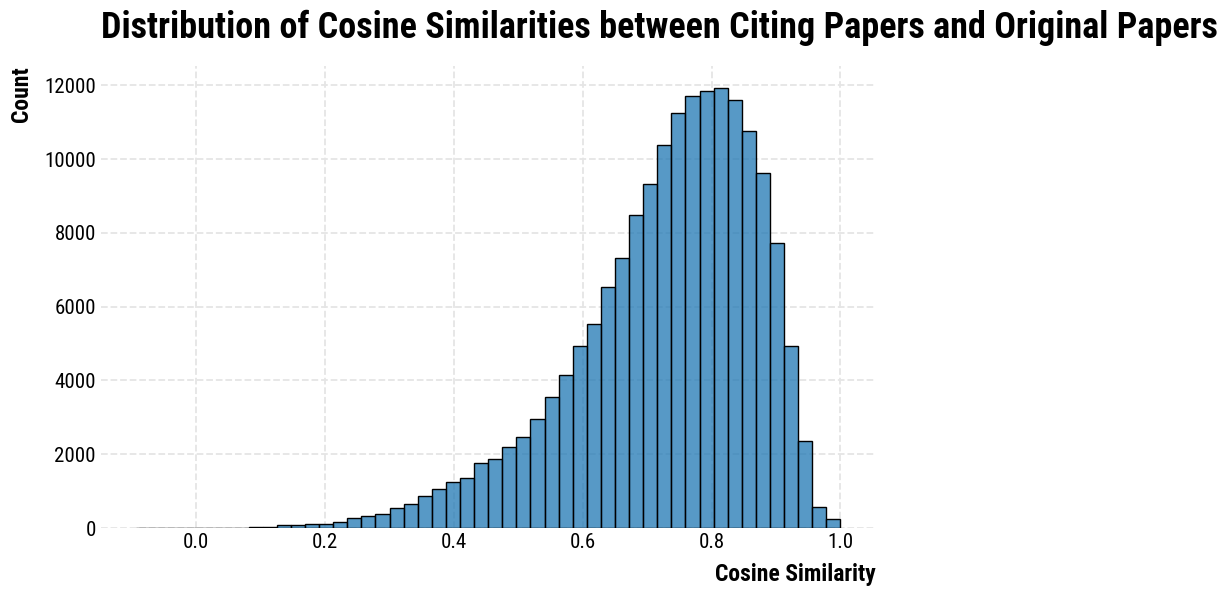

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a histogram of cosine similarities
plt.figure(figsize=(10, 6))
sns.histplot(data=citing_records_df['cosine_similarity'].dropna(), bins=50)
plt.title('Distribution of Cosine Similarities between Citing Papers and Original Papers')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.show()


In [18]:
import pandas as pd
import numpy as np

# Create a lookup dictionary mapping each paper's ID (from merged_df) to its retraction date (as a datetime)
merged_retraction_date_lookup = dict(zip(merged_df['id'],
                                           pd.to_datetime(merged_df['retraction_date_column'])))

# Determine the citing paper's publication date.
# If the citing_records_df has a column 'publication_date', use that.
# Otherwise, fallback to 'publication_year' by assuming January 1st of that year.
if 'publication_date' in citing_records_df.columns:
    citing_records_df['publication_date'] = pd.to_datetime(citing_records_df['publication_date'])
    citing_pub_dates = citing_records_df['publication_date']
elif 'publication_year' in citing_records_df.columns:
    citing_pub_dates = pd.to_datetime(citing_records_df['publication_year'].astype(str) + "-01-01")
else:
    raise ValueError("Citing records dataframe does not contain a recognizable publication date indicator.")

def compute_years_diff(citing_date, retraction_date):
    r"""
    Compute the difference in years between citing_date and retraction_date.
    
    Positive value: citing_date is after retraction_date.
    Negative value: citing_date is before retraction_date.
    
    Calculation:
    
    \[
    \text{years difference} = \frac{\text{citing date} - \text{retraction date (in days)}}{365.25}
    \]
    """
    diff_days = (citing_date - retraction_date).days
    return diff_days / 365.25

# For each citing record, look up the corresponding retraction date using the 'id_of_citing_paper'
# and compute the year difference.
years_diff_list = []
for citing_id, citing_date in zip(citing_records_df['id_of_citing_paper'], citing_pub_dates):
    retraction_date = merged_retraction_date_lookup.get(citing_id, None)
    if retraction_date is not None:
        delta_years = compute_years_diff(citing_date, retraction_date)
    else:
        delta_years = np.nan  # or choose to skip / handle missing values differently
    years_diff_list.append(delta_years)

# Add the computed year difference to the citing records dataframe
citing_records_df['years_from_retraction'] = years_diff_list

# Display the updated dataframe (in Jupyter it will render as an HTML table)
display(citing_records_df)

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,fulltext_origin,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,id_of_citing_paper,is_authors_truncated,abstract,parsed_publication,journal_id,cosine_similarity,years_from_retraction
0,https://openalex.org/W3126870425,10.1155/2021/6690539,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,2021,2021-02-02,{'openalex': 'https://openalex.org/W3126870425...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,"[crossref, doaj, pubmed]","{'is_oa': True, 'oa_status': 'gold', 'oa_url':...","[{'author_position': 'first', 'author': {'id':...",[],1,2,[https://openalex.org/A5078261567],[https://openalex.org/I42317466],"{'value': 1650, 'currency': 'USD', 'value_usd'...","{'value': 1650, 'currency': 'USD', 'value_usd'...",6.979,True,pdf,69,"{'value': 0.818396, 'is_in_top_1_percent': Fal...","{'min': 98, 'max': 99}","{'volume': '2021', 'issue': None, 'first_page'...",True,False,"{'id': 'https://openalex.org/T12702', 'display...","[{'id': 'https://openalex.org/T12702', 'displa...",[{'id': 'https://openalex.org/keywords/dropout...,"[{'id': 'https://openalex.org/C81363708', 'wik...",[],5,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.56, 'id': 'https://metadata.un.or...",[{'funder': 'https://openalex.org/F4320332161'...,[],[],52,"[https://openalex.org/W1093064829, https://ope...","[https://openalex.org/W4285488523, https://ope...","{'There': [0], 'are': [1, 41], 'many': [2, 198...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 13}, {'year'...",2025-02-13T13:56:57.739046,2021-02-15,https://openalex.org/W3101413762,NaN,There are many kinds of brain abnormalities th...,Applied Bionics and Biomechanics,https://openalex.org/S50311662,NaN,NaN
1,https://openalex.org/W4390840114,10.53759/0088/jbsha20240408,Advances and Challenges in Closed Loop Therape...,Advances and Challenges in Closed Loop Therape...,2024,2024-01-05,{'openalex': 'https://openalex.org/W4390840114...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,[crossref],"{'is_oa': True, 'oa_status': 'hybrid', 'oa_url...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5067404312],[https://openalex.org/I99682543],None,None,4.902,True,pdf,4,"{'value': 0.723564, 'is_in_top_1_percent': Fal...","{'min': 96, 'max': 97}","{'volume': None, 'issue': None, 'first_page': ...",False,False,"{'id': 'https://openalex.org/T11601', 'display...","[{'id': 'https://openalex.org/T11601', 'displa...",[{'id': 'https://openalex.org/keywords/aptamer...,"[{'id': 'https://openalex.org/C50738837', 'wik...",[],1,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.64, 'id': 'https://metadata.un.or...",[],[],[],27,"[https://openalex.org/W1719220832, https://ope...","[https://openalex.org/W4389944751, https://ope...","{'The': [0, 56, 71, 129], 'main': [1], 'object...",None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 4}]",2025-02-12T07:25:56.432138,2024-01-14,https://openalex.org/W3101413762,NaN,The main objective of this paper is to develop...,Journal of Biomedical and Sustainable Healthca...,https://openalex.or

In [19]:
# First, create a lookup dictionary for the publication date of each cited paper (from merged_df).
# Ensure that the column name 'publication_date_column' matches your actual data. 
merged_pub_date_lookup = dict(zip(merged_df['id'],
                                  pd.to_datetime(merged_df['publication_date_column'])))

# Next, determine the publication dates for the citing papers.
# We use 'publication_date' if available, or fall back to using 'publication_year'.
if 'publication_date' in citing_records_df.columns:
    citing_records_df['publication_date'] = pd.to_datetime(citing_records_df['publication_date'])
    citing_pub_dates = citing_records_df['publication_date']
elif 'publication_year' in citing_records_df.columns:
    citing_pub_dates = pd.to_datetime(citing_records_df['publication_year'].astype(str) + "-01-01")
else:
    raise ValueError("Citing records dataframe does not contain a recognizable publication date indicator.")

def compute_citation_age(citing_date, cited_date):
    r"""
    Compute the age of the citation in years, defined as:
    
    \[
    \text{citation\_age} = \frac{\text{citing date} - \text{cited date (in days)}}{365.25}
    \]
    
    Args:
        citing_date (datetime): Publication date of the citing paper.
        cited_date (datetime): Publication date of the cited paper.
        
    Returns:
        float: Age in years.
    """
    diff_days = (citing_date - cited_date).days
    return diff_days / 365.25

# Compute the citation age for each record.
citation_age_list = []
for cited_id, citing_date in zip(citing_records_df['id_of_citing_paper'], citing_pub_dates):
    # Look up the cited paper's publication date using its ID.
    cited_pub_date = merged_pub_date_lookup.get(cited_id, None)
    if cited_pub_date is not None:
        age_years = compute_citation_age(citing_date, cited_pub_date)
    else:
        age_years = np.nan  # Handle missing values as needed.
    citation_age_list.append(age_years)

# Add the citation age to the citing records dataframe.
citing_records_df['citation_age'] = citation_age_list

# Display the updated dataframe (in a Jupyter cell this will be rendered as an HTML table).
display(citing_records_df)

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,fulltext_origin,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,id_of_citing_paper,is_authors_truncated,abstract,parsed_publication,journal_id,cosine_similarity,years_from_retraction,citation_age
0,https://openalex.org/W3126870425,10.1155/2021/6690539,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,Diagnosis of Alzheimer Disease Using 2D MRI Sl...,2021,2021-02-02,{'openalex': 'https://openalex.org/W3126870425...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,"[crossref, doaj, pubmed]","{'is_oa': True, 'oa_status': 'gold', 'oa_url':...","[{'author_position': 'first', 'author': {'id':...",[],1,2,[https://openalex.org/A5078261567],[https://openalex.org/I42317466],"{'value': 1650, 'currency': 'USD', 'value_usd'...","{'value': 1650, 'currency': 'USD', 'value_usd'...",6.979,True,pdf,69,"{'value': 0.818396, 'is_in_top_1_percent': Fal...","{'min': 98, 'max': 99}","{'volume': '2021', 'issue': None, 'first_page'...",True,False,"{'id': 'https://openalex.org/T12702', 'display...","[{'id': 'https://openalex.org/T12702', 'displa...",[{'id': 'https://openalex.org/keywords/dropout...,"[{'id': 'https://openalex.org/C81363708', 'wik...",[],5,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.56, 'id': 'https://metadata.un.or...",[{'funder': 'https://openalex.org/F4320332161'...,[],[],52,"[https://openalex.org/W1093064829, https://ope...","[https://openalex.org/W4285488523, https://ope...","{'There': [0], 'are': [1, 41], 'many': [2, 198...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 13}, {'year'...",2025-02-13T13:56:57.739046,2021-02-15,https://openalex.org/W3101413762,NaN,There are many kinds of brain abnormalities th...,Applied Bionics and Biomechanics,https://openalex.org/S50311662,NaN,NaN,NaN
1,https://openalex.org/W4390840114,10.53759/0088/jbsha20240408,Advances and Challenges in Closed Loop Therape...,Advances and Challenges in Closed Loop Therape...,2024,2024-01-05,{'openalex': 'https://openalex.org/W4390840114...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,[crossref],"{'is_oa': True, 'oa_status': 'hybrid', 'oa_url...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5067404312],[https://openalex.org/I99682543],None,None,4.902,True,pdf,4,"{'value': 0.723564, 'is_in_top_1_percent': Fal...","{'min': 96, 'max': 97}","{'volume': None, 'issue': None, 'first_page': ...",False,False,"{'id': 'https://openalex.org/T11601', 'display...","[{'id': 'https://openalex.org/T11601', 'displa...",[{'id': 'https://openalex.org/keywords/aptamer...,"[{'id': 'https://openalex.org/C50738837', 'wik...",[],1,"[{'is_oa': True, 'landing_page_url': 'https://...","{'is_oa': True, 'landing_page_url': 'https://d...","[{'score': 0.64, 'id': 'https://metadata.un.or...",[],[],[],27,"[https://openalex.org/W1719220832, https://ope...","[https://openalex.org/W4389944751, https://ope...","{'The': [0, 56, 71, 129], 'main': [1], 'object...",None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 4}]",2025-02-12T07:25:56.432138,2024-01-14,https://openalex.org/W3101413762,NaN,The main objective of this paper is to develop...,Journal of Biomedical and Sustainable Healthca...,ht

In [20]:

# Find the most common citing paper ID
most_common_citing_paper = citing_records_df[citing_records_df['cosine_similarity'].notna()]['id_of_citing_paper'].mode().iloc[0]

# Get count of citations from this paper
citation_count = citing_records_df['id_of_citing_paper'].value_counts().iloc[0]

print(f"Most common citing paper ID: {most_common_citing_paper}")
print(f"Number of citations from this paper: {citation_count}")


Most common citing paper ID: https://openalex.org/W1966242613
Number of citations from this paper: 6304


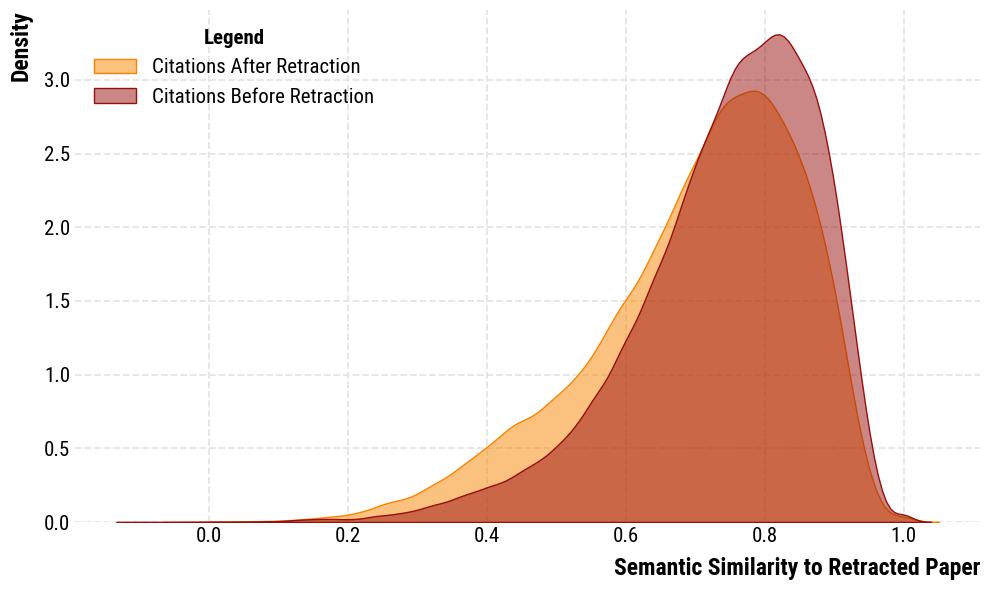

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Split data into positive and negative years from retraction
positive = citing_records_df[citing_records_df['years_from_retraction'] >= 0]
negative = citing_records_df[citing_records_df['years_from_retraction'] < 0]

# Ensure we drop any NaN values from the cosine_similarity column
positive_cosine = positive['cosine_similarity'].dropna()
negative_cosine = negative['cosine_similarity'].dropna()

plt.figure(figsize=(10, 6))

# Plot the KDE for papers published after retraction (non-negative years)
sns.kdeplot(
    data=positive_cosine,
    color='#f98400',
    label='Citations After Retraction',
    fill=True,
    alpha=0.5
)

# Plot the KDE for papers published before retraction (negative years) 
sns.kdeplot(
    data=negative_cosine,
    color='#980f0e',
    label='Citations Before Retraction',
    fill=True,
    alpha=0.5
)

#plt.title('Overlapping Distributions of Cosine Similarities')
plt.xlabel('Semantic Similarity to Retracted Paper')
plt.ylabel('Density')
legend = plt.legend(title='Legend', loc='upper left')
legend.get_title().set_fontweight('bold')
plt.tight_layout()
# Save figure with tight layout and 300 dpi
plt.savefig('images/semantic_similarity_distributions.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')

plt.show()

In [48]:
raw_data = citing_records_df[['years_from_retraction','cosine_similarity']]
raw_data.columns = ['time','similarity']
raw_data = raw_data.dropna()

In [49]:
raw_data

,time,similarity
14,-0.670773,0.861862
15,-1.533196,0.614352
16,-2.861054,0.815253
17,-0.454483,0.903216
18,-3.871321,0.618666
...,...,...
348197,1.754962,0.463115
348198,1.924709,0.595924
348199,0.000000,0.555381
348200,3.315537,0.654596


In [50]:

raw_data = raw_data[
    (raw_data['time'] >= -8) & 
    (raw_data['time'] <= 8) & 
    (raw_data['similarity'] >= 0) & 
    (raw_data['similarity'] <= 1)
]
raw_data

,time,similarity
14,-0.670773,0.861862
15,-1.533196,0.614352
16,-2.861054,0.815253
17,-0.454483,0.903216
18,-3.871321,0.618666
...,...,...
348197,1.754962,0.463115
348198,1.924709,0.595924
348199,0.000000,0.555381
348200,3.315537,0.654596


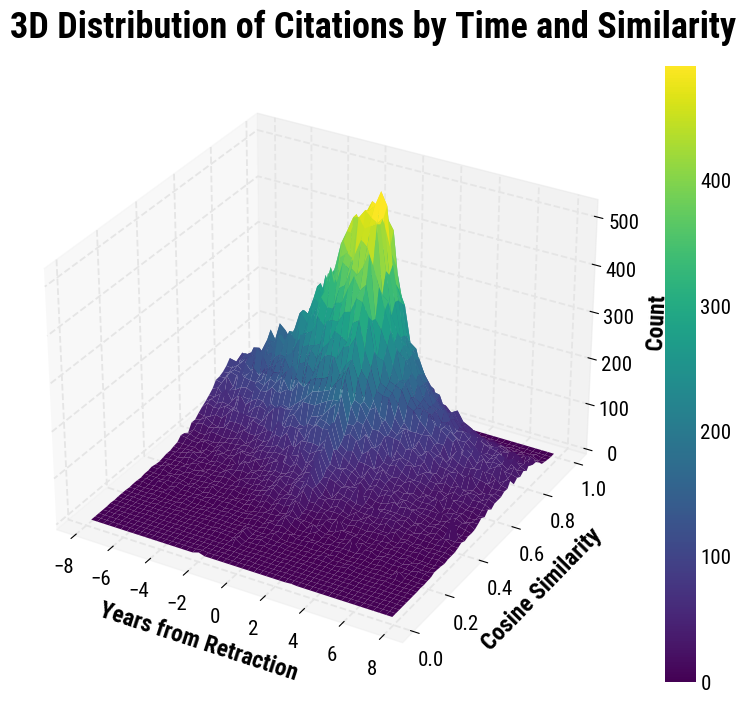

In [51]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 2D histogram data
hist, x_edges, y_edges = np.histogram2d(
    raw_data['time'], 
    raw_data['similarity'],
    bins=50
)

# Create mesh grid for 3D plot
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
X, Y = np.meshgrid(x_centers, y_centers)

# Plot surface
surf = ax.plot_surface(X, Y, hist.T, cmap='viridis')

# Add labels and colorbar
ax.set_xlabel('Years from Retraction')
ax.set_ylabel('Cosine Similarity')
ax.set_zlabel('Count')
plt.colorbar(surf)

plt.title('3D Distribution of Citations by Time and Similarity')
plt.show()

In [52]:


# Create bins (customize bin sizes as appropriate)
raw_data['time_bin'] = pd.cut(raw_data['time'], bins=50)
raw_data['location_bin'] = pd.cut(raw_data['similarity'], bins=50)

# Count events per bin
aggregated = raw_data.groupby(['time_bin', 'location_bin']).size().reset_index(name='count')

# For modeling, you’ll likely need to extract numeric representations for time and location,
# for example, using the midpoint of each bin:
aggregated['time_mid'] = aggregated['time_bin'].apply(lambda x: x.mid)
aggregated['location_mid'] = aggregated['location_bin'].apply(lambda x: x.mid)

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/2248184113.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated = raw_data.groupby(['time_bin', 'location_bin']).size().reset_index(name='count')


In [53]:
aggregated

,time_bin,location_bin,count,time_mid,location_mid
0,"(-8.016, -7.68]","(-0.000336, 0.0206]",0,-7.848,0.010132
1,"(-8.016, -7.68]","(0.0206, 0.0406]",0,-7.848,0.030600
2,"(-8.016, -7.68]","(0.0406, 0.0606]",0,-7.848,0.050600
3,"(-8.016, -7.68]","(0.0606, 0.0806]",0,-7.848,0.070600
4,"(-8.016, -7.68]","(0.0806, 0.101]",0,-7.848,0.090800
...,...,...,...,...,...
2495,"(7.68, 8.0]","(0.9, 0.92]",5,7.840,0.910000
2496,"(7.68, 8.0]","(0.92, 0.94]",3,7.840,0.930000
2497,"(7.68, 8.0]","(0.94, 0.96]",1,7.840,0.950000
2498,"(7.68, 8.0]","(0.96, 0.98]",0,7.840,0.970000


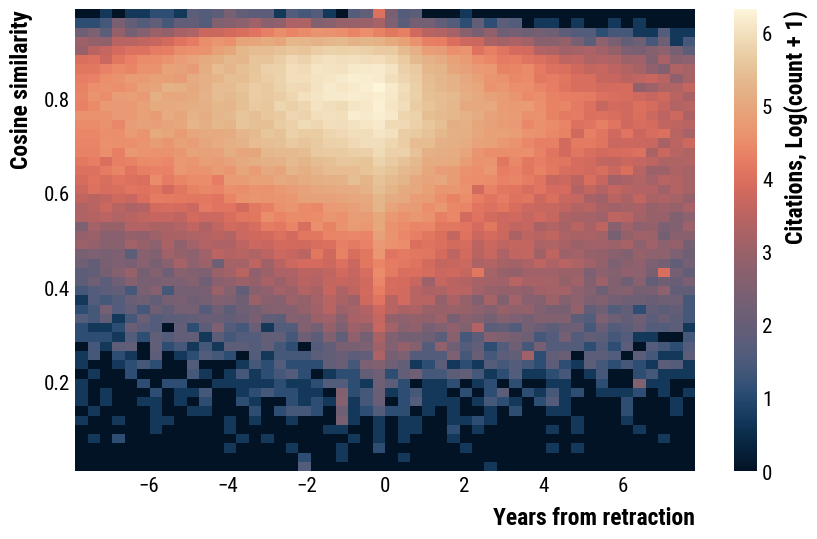

In [54]:
plt.figure(figsize=(10, 6))
plt.hist2d(aggregated['time_mid'], aggregated['location_mid'], weights=np.log1p(aggregated['count']), bins=50, cmap=cmaps.lipari)
plt.colorbar(label='Citations, Log(count + 1)')
plt.xlabel('Years from retraction')
plt.ylabel('Cosine similarity')
plt.show()

In [55]:
import scipy.sparse

def to_array(self):
    return self.toarray()

scipy.sparse.spmatrix.A = property(to_array)

import pygam

from pygam import PoissonGAM, s

# Create design matrix X and response y
X = aggregated[['time_mid', 'location_mid']].values
y = aggregated['count'].values

# Build a GAM with separate smooths for time and location
gam = PoissonGAM(s(0) + s(1))
gam.fit(X, y)

# To predict counts on new data:
import numpy as np

# Create a grid of new time and location values
new_time = np.linspace(aggregated['time_mid'].min(), aggregated['time_mid'].max(), 100)
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
X_new = np.array([[t, loc] for t in new_time for loc in new_location])
predicted_counts = gam.predict(X_new)

In [56]:
predicted_counts

array([0.03234411, 0.03620041, 0.04099907, ..., 1.72471587, 0.89730299,
       0.45008836])

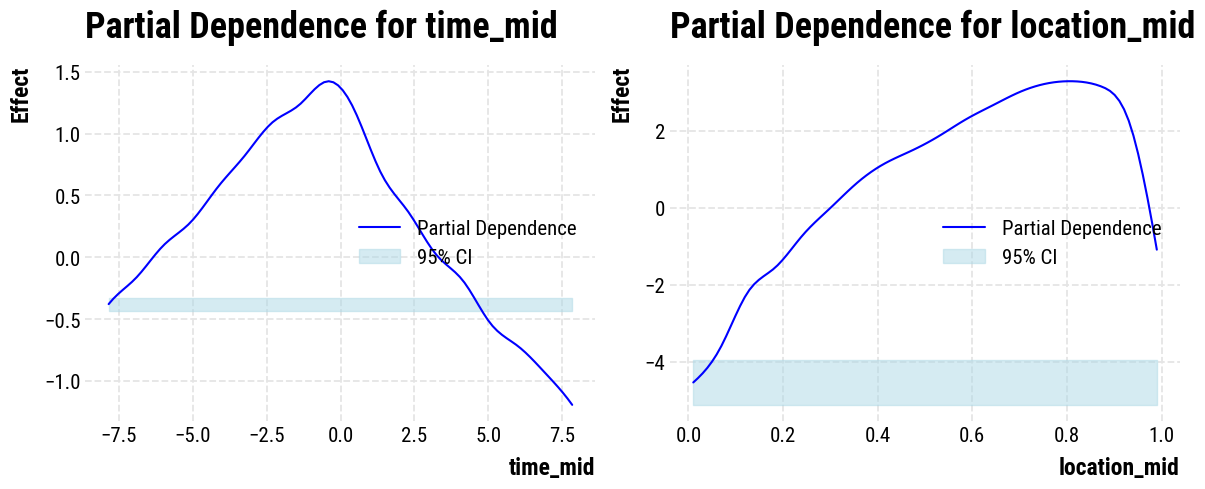

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_partial_dependencies(gam, feature_names=['time_mid', 'location_mid']):
    """
    Plot partial dependence plots for the fitted GAM model.

    Args:
        gam: A fitted pygam model (e.g., PoissonGAM).
        feature_names (list): List of feature names corresponding to each model term.
    """
    n_terms = len(feature_names)
    
    # Create subplots with one panel per term
    fig, axs = plt.subplots(1, n_terms, figsize=(6 * n_terms, 5))
    
    # Always work with a list of axes
    if n_terms == 1:
        axs = [axs]
    
    # For each term, generate grid, compute partial dependence, and plot
    for i in range(n_terms):
        # Generate a grid specific to the i-th term (other features are held at median values)
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
        
        # Check the shape of 'confi' (should be (2, n_grid_points)).
        # If it only has two values, replicate them across the grid.
        if (confi.ndim == 1) or (confi.shape[1] != XX.shape[0]):
            confi = np.tile(confi.reshape(-1, 1), (1, XX.shape[0]))
        
        ax = axs[i]
        ax.plot(XX[:, i], pdep, label='Partial Dependence', color='blue')
        ax.fill_between(XX[:, i], confi[0], confi[1], color='lightblue', alpha=0.5, label='95% CI')
        ax.set_title(f'Partial Dependence for {feature_names[i]}')
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Effect')
        ax.legend()
    
    plt.tight_layout()
    plt.show()


# Example usage:
# Assuming you have already built your GAM model as:
#
# from pygam import PoissonGAM, s
# X = aggregated[['time_mid', 'location_mid']].values
# y = aggregated['count'].values
# gam = PoissonGAM(s(0) + s(1))
# gam.fit(X, y)
#
# Then you can plot partial dependencies as follows:

plot_partial_dependencies(gam)

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     19.6004
Link Function:                          LogLink Log Likelihood:                                 -9354.1932
Number of Samples:                         2500 AIC:                                            18747.5872
                                                AICc:                                           18747.9463
                                                UBRE:                                               5.2018
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9709
Feature Function                  Lam

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/4280386846.py:30: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_int.summary())


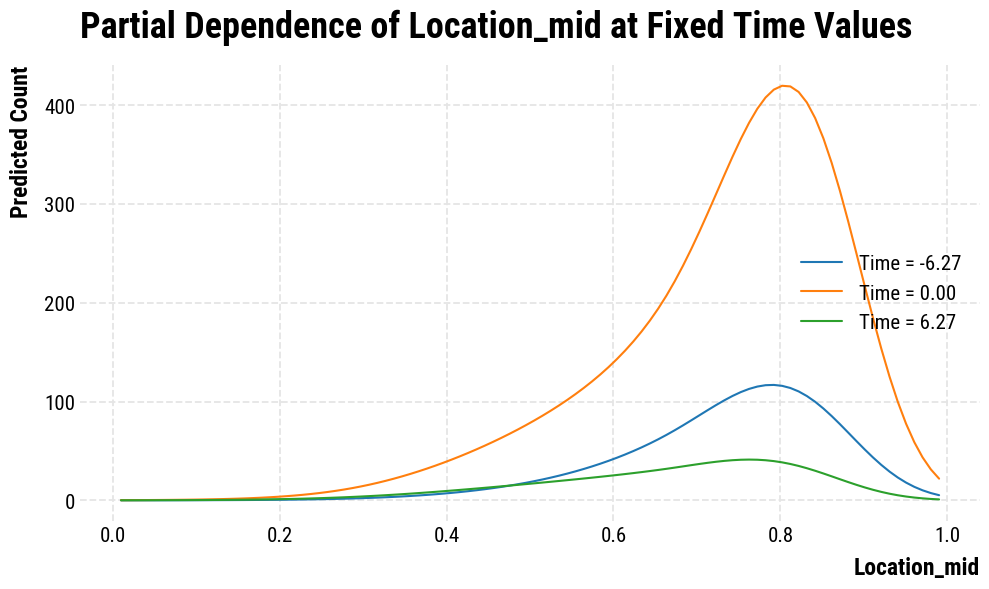

In [58]:
# Model with interaction term and conditional partial dependence plots

import scipy.sparse
def to_array(self):
    return self.toarray()
scipy.sparse.spmatrix.A = property(to_array)

import numpy as np
import matplotlib.pyplot as plt
import pygam
from pygam import PoissonGAM, s, te

# Assume that 'aggregated' is already defined and contains the columns:
# 'time_mid' (numeric, representing years from retraction),
# 'location_mid' (numeric, the midpoint of location bins),
# and 'count' (the count of citations per bin).

# Create the design matrix X and response vector y.
X = aggregated[['time_mid', 'location_mid']].values
y = aggregated['count'].values

# Build a GAM that includes both main effects (smooth terms for time and location)
# and their interaction (tensor product smooth).
gam_int = PoissonGAM(s(0,n_splines=6) + s(1,n_splines=6) + 
                     te(0, 1,n_splines=6))
gam_int.fit(X, y)

# Print the model summary which includes statistics (such as p-values)
# to help you check the significance of the interaction term.
print(gam_int.summary())

# Now, we create partial dependence plots for the location parameter,
# conditioning on several fixed time values.
# For example, we select fixed time values at the 10th, 50th, and 90th percentiles.
fixed_time_values = np.percentile(aggregated['time_mid'], [10, 50, 90])
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)

plt.figure(figsize=(10, 6))
for ft in fixed_time_values:
    # For each fixed time value, create a grid where time is held constant.
    X_fixed = np.column_stack([np.full(new_location.shape, ft), new_location])
    # Predict counts on the grid.
    preds = gam_int.predict(X_fixed)
    plt.plot(new_location, preds, label=f"Time = {ft:.2f}")

plt.xlabel("Location_mid")
plt.ylabel("Predicted Count")
plt.title("Partial Dependence of Location_mid at Fixed Time Values")
plt.legend()
plt.tight_layout()
plt.show()

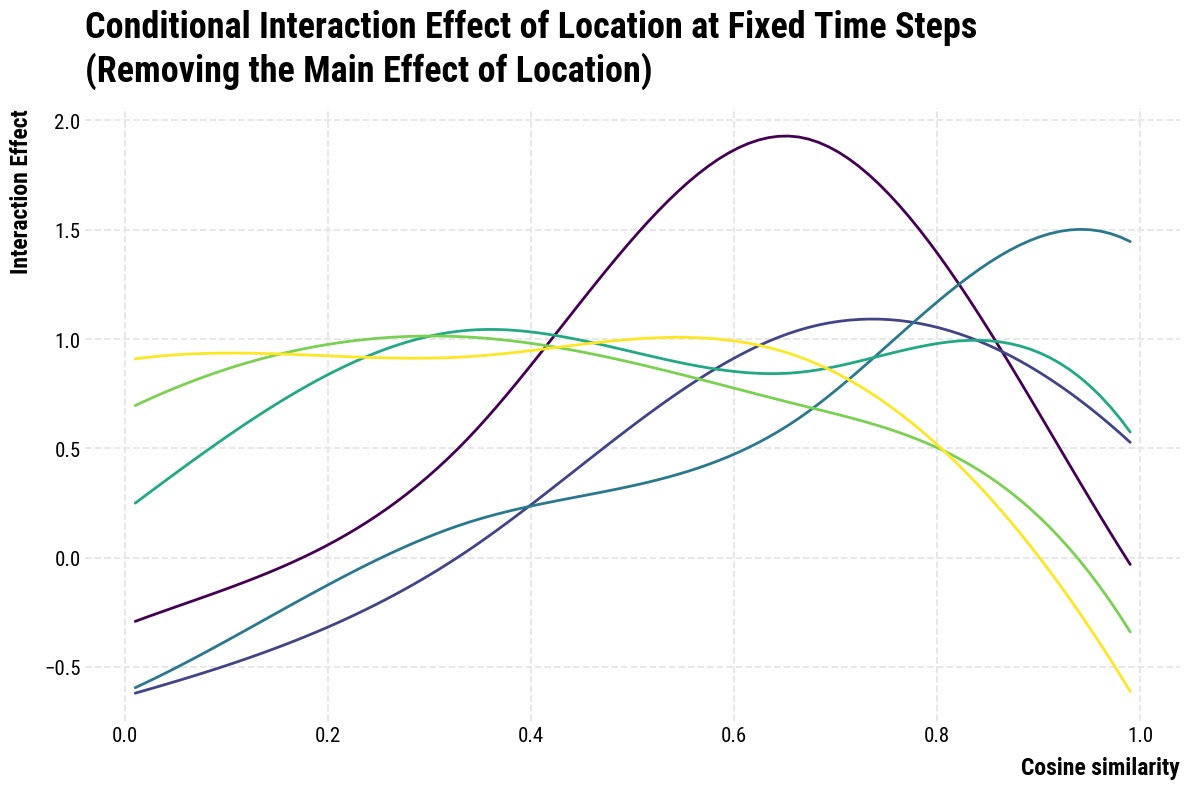

In [59]:
# Divide the whole time range into 10 fixed time steps.

# Divide the full time range into 10 fixed time points.
fixed_time_values = np.linspace(-15,15,6)
# Create a grid for the location parameter.
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)

plt.figure(figsize=(12, 8))
# Use a colormap to assign a unique color for each fixed time value.
colors = plt.cm.viridis(np.linspace(0, 1, len(fixed_time_values)))

for i, ft in enumerate(fixed_time_values):
    # For each fixed time value, create a grid where time is fixed at ft.
    X_fixed = np.column_stack([np.full(new_location.shape, ft), new_location])
    # Get the partial dependence of the interaction (tensor) term, which is term index 2.
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    plt.plot(new_location, interaction_effect, label=f"Time = {ft:.2f}", color=colors[i], linewidth=2)
   # plt.fill_between(new_location, confi[0], confi[1], color=colors[i], alpha=0.3)

plt.xlabel("Cosine similarity")
plt.ylabel("Interaction Effect")
plt.title("Conditional Interaction Effect of Location at Fixed Time Steps\n(Removing the Main Effect of Location)")
#plt.legend(title="Fixed Time Value")
plt.tight_layout()
plt.show()

In [60]:
fixed_time_values

array([-15.,  -9.,  -3.,   3.,   9.,  15.])

# Model with citation age term

In [61]:
raw_data = citing_records_df[['years_from_retraction','cosine_similarity', 'citation_age']]
raw_data.columns = ['time','similarity', 'citation_age']
raw_data = raw_data.dropna()
raw_data = raw_data[
    (raw_data['time'] >= -8) & 
    (raw_data['time'] <= 8) & 
    (raw_data['similarity'] >= 0) & 
    (raw_data['similarity'] <= 1) &
    (raw_data['citation_age'] >= 0) & # Why have we sub zero ages?
    (raw_data['citation_age'] <= 20)
]
raw_data

,time,similarity,citation_age
14,-0.670773,0.861862,4.068446
15,-1.533196,0.614352,3.206023
16,-2.861054,0.815253,1.878166
17,-0.454483,0.903216,4.284736
18,-3.871321,0.618666,0.867899
...,...,...,...
348197,1.754962,0.463115,8.290212
348198,1.924709,0.595924,8.459959
348199,0.000000,0.555381,6.535250
348200,3.315537,0.654596,9.850787


<Axes: xlabel='citation_age', ylabel='Count'>

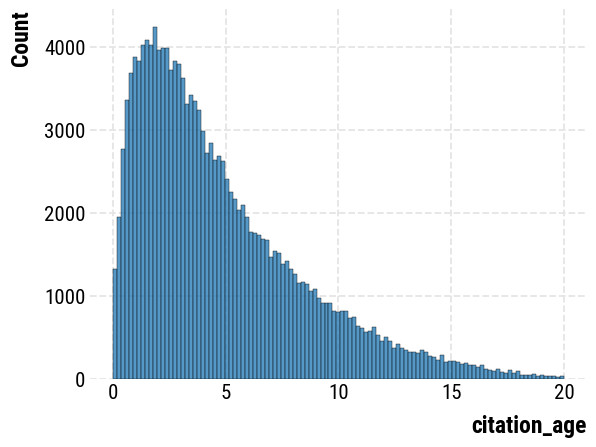

In [62]:
sns.histplot(raw_data['citation_age'])

In [63]:
# Create bins (customize bin sizes as appropriate)
raw_data['time_bin'] = pd.cut(raw_data['time'], bins=50)
raw_data['location_bin'] = pd.cut(raw_data['similarity'], bins=50)
raw_data['citation_age_bin'] = pd.cut(raw_data['citation_age'], bins=50)

# Count events per bin
aggregated = raw_data.groupby(['time_bin', 'location_bin', 'citation_age_bin']).size().reset_index(name='count')

# For modeling, you'll likely need to extract numeric representations for time and location,
# for example, using the midpoint of each bin:
aggregated['time_mid'] = aggregated['time_bin'].apply(lambda x: x.mid)
aggregated['location_mid'] = aggregated['location_bin'].apply(lambda x: x.mid)
aggregated['citation_age_mid'] = aggregated['citation_age_bin'].apply(lambda x: x.mid)
aggregated

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/919616970.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated = raw_data.groupby(['time_bin', 'location_bin', 'citation_age_bin']).size().reset_index(name='count')


,time_bin,location_bin,citation_age_bin,count,time_mid,location_mid,citation_age_mid
0,"(-8.016, -7.68]","(-0.000336, 0.0206]","(-0.02, 0.4]",0,-7.848,0.010132,0.19
1,"(-8.016, -7.68]","(-0.000336, 0.0206]","(0.4, 0.8]",0,-7.848,0.010132,0.60
2,"(-8.016, -7.68]","(-0.000336, 0.0206]","(0.8, 1.2]",0,-7.848,0.010132,1.00
3,"(-8.016, -7.68]","(-0.000336, 0.0206]","(1.2, 1.6]",0,-7.848,0.010132,1.40
4,"(-8.016, -7.68]","(-0.000336, 0.0206]","(1.6, 2.0]",0,-7.848,0.010132,1.80
...,...,...,...,...,...,...,...
124995,"(7.68, 8.0]","(0.98, 1.0]","(18.0, 18.4]",0,7.840,0.990000,18.20
124996,"(7.68, 8.0]","(0.98, 1.0]","(18.4, 18.8]",0,7.840,0.990000,18.60
124997,"(7.68, 8.0]","(0.98, 1.0]","(18.8, 19.2]",0,7.840,0.990000,19.00
124998,"(7.68, 8.0]","(0.98, 1.0]","(19.2, 19.6]",0,7.840,0.990000,19.40


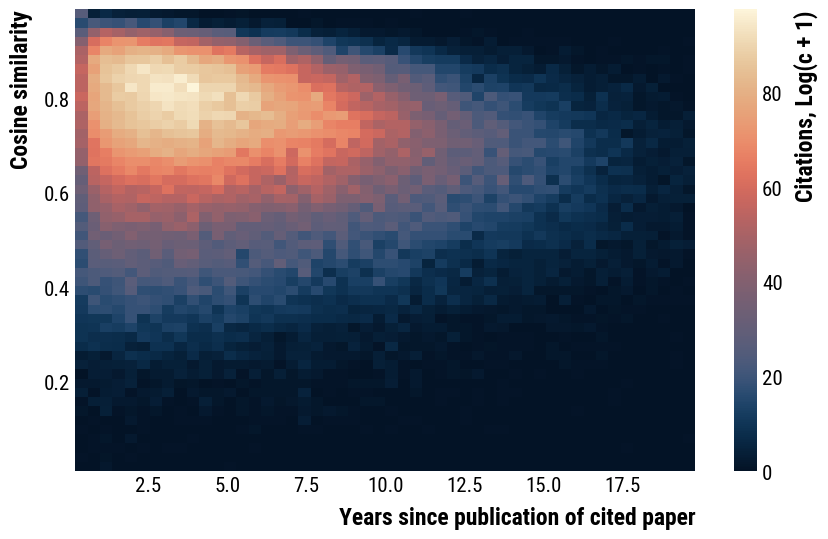

In [64]:
plt.figure(figsize=(10, 6))
plt.hist2d(aggregated['citation_age_mid'], aggregated['location_mid'], weights=np.log1p(aggregated['count'])
           , bins=50, cmap=cmaps.lipari)
plt.colorbar(label='Citations, Log(c + 1)')
plt.xlabel('Years since publication of cited paper')
plt.ylabel('Cosine similarity')
plt.show()

<Axes: xlabel='count', ylabel='Count'>

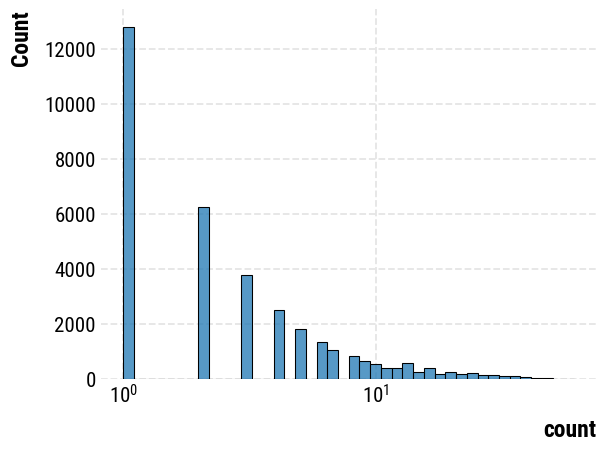

In [65]:
sns.histplot(aggregated['count'],log_scale=True)

In [66]:
# Model with interaction term and conditional partial dependence plots

import scipy.sparse
def to_array(self):
    return self.toarray()
scipy.sparse.spmatrix.A = property(to_array)

import numpy as np
import matplotlib.pyplot as plt
import pygam
from pygam import PoissonGAM, s, te

# Assume that 'aggregated' is already defined and contains the columns:
# 'time_mid' (numeric, representing years from retraction),
# 'location_mid' (numeric, the midpoint of location bins),
# and 'count' (the count of citations per bin).

# Create the design matrix X and response vector y.
X = aggregated[['location_mid','citation_age_mid', 'time_mid',]].values
y = aggregated['count'].values

# Build a GAM that includes both main effects (smooth terms for time and location)
# and their interaction (tensor product smooth).
gam_int = PoissonGAM(s(0,n_splines=6) + 
                     s(1,n_splines=6) + 
                   #  te(0,1,n_splines=5) +
                    te(0, 2,n_splines=6)
                   )
gam_int.fit(X, y)

# Print the model summary which includes statistics (such as p-values)
# to help you check the significance of the interaction term.
print(gam_int.summary())



PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     23.8622
Link Function:                          LogLink Log Likelihood:                               -121947.2201
Number of Samples:                       125000 AIC:                                           243942.1647
                                                AICc:                                           243942.175
                                                UBRE:                                               3.1472
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.7409
Feature Function                  Lam

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/873133239.py:33: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_int.summary())


[[ 5.00204640e-01  1.90000000e-01 -1.60000000e-04]
 [ 5.00204640e-01  3.88080808e-01 -1.60000000e-04]
 [ 5.00204640e-01  5.86161616e-01 -1.60000000e-04]
 [ 5.00204640e-01  7.84242424e-01 -1.60000000e-04]
 [ 5.00204640e-01  9.82323232e-01 -1.60000000e-04]
 [ 5.00204640e-01  1.18040404e+00 -1.60000000e-04]
 [ 5.00204640e-01  1.37848485e+00 -1.60000000e-04]
 [ 5.00204640e-01  1.57656566e+00 -1.60000000e-04]
 [ 5.00204640e-01  1.77464646e+00 -1.60000000e-04]
 [ 5.00204640e-01  1.97272727e+00 -1.60000000e-04]
 [ 5.00204640e-01  2.17080808e+00 -1.60000000e-04]
 [ 5.00204640e-01  2.36888889e+00 -1.60000000e-04]
 [ 5.00204640e-01  2.56696970e+00 -1.60000000e-04]
 [ 5.00204640e-01  2.76505051e+00 -1.60000000e-04]
 [ 5.00204640e-01  2.96313131e+00 -1.60000000e-04]
 [ 5.00204640e-01  3.16121212e+00 -1.60000000e-04]
 [ 5.00204640e-01  3.35929293e+00 -1.60000000e-04]
 [ 5.00204640e-01  3.55737374e+00 -1.60000000e-04]
 [ 5.00204640e-01  3.75545455e+00 -1.60000000e-04]
 [ 5.00204640e-01  3.95353535e+

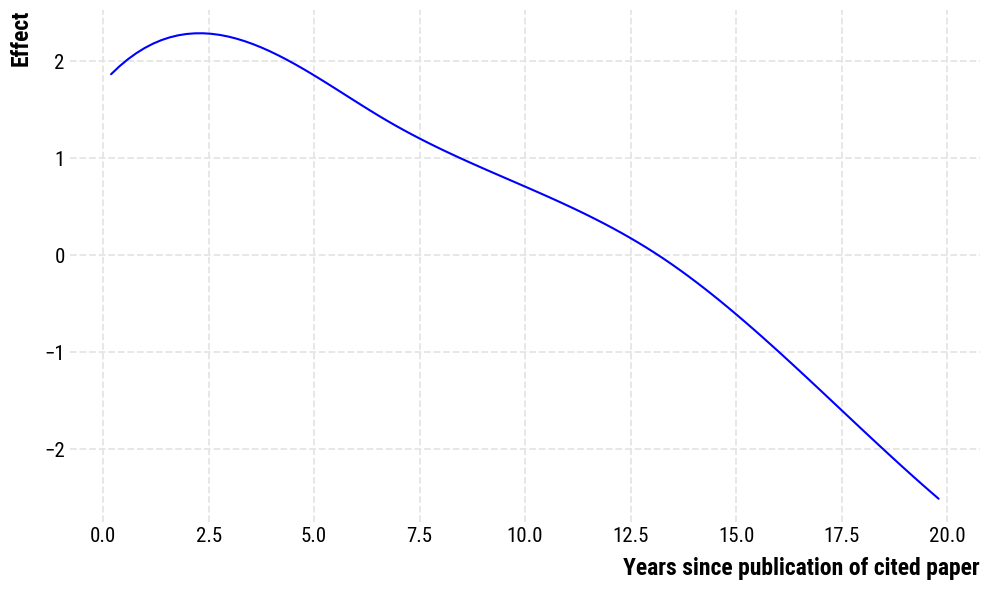

In [67]:


# Generate a grid specific to the second term (other features held at median values)
XX = np.zeros((100, X.shape[1]))
XX[:, 1] = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
XX[:, 2] = X[:, 2].mean()
XX[:, 0] = X[:, 0].mean()

print(XX)

pdep, confi = gam_int.partial_dependence(term=1, X=XX, width=0.95)

plt.figure(figsize=(10,6))
plt.plot(XX[:, 1], pdep, label='Citation frequency as function of age', color='blue')
plt.ylabel('Effect')
plt.xlabel('Years since publication of cited paper')
plt.tight_layout()
plt.show()

[[ 1.01320000e-02  9.99980000e+00 -1.60000000e-04]
 [ 2.00296566e-02  9.99980000e+00 -1.60000000e-04]
 [ 2.99273131e-02  9.99980000e+00 -1.60000000e-04]
 [ 3.98249697e-02  9.99980000e+00 -1.60000000e-04]
 [ 4.97226263e-02  9.99980000e+00 -1.60000000e-04]
 [ 5.96202828e-02  9.99980000e+00 -1.60000000e-04]
 [ 6.95179394e-02  9.99980000e+00 -1.60000000e-04]
 [ 7.94155960e-02  9.99980000e+00 -1.60000000e-04]
 [ 8.93132525e-02  9.99980000e+00 -1.60000000e-04]
 [ 9.92109091e-02  9.99980000e+00 -1.60000000e-04]
 [ 1.09108566e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.19006222e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.28903879e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.38801535e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.48699192e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.58596848e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.68494505e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.78392162e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.88289818e-01  9.99980000e+00 -1.60000000e-04]
 [ 1.98187475e-01  9.99980000e+

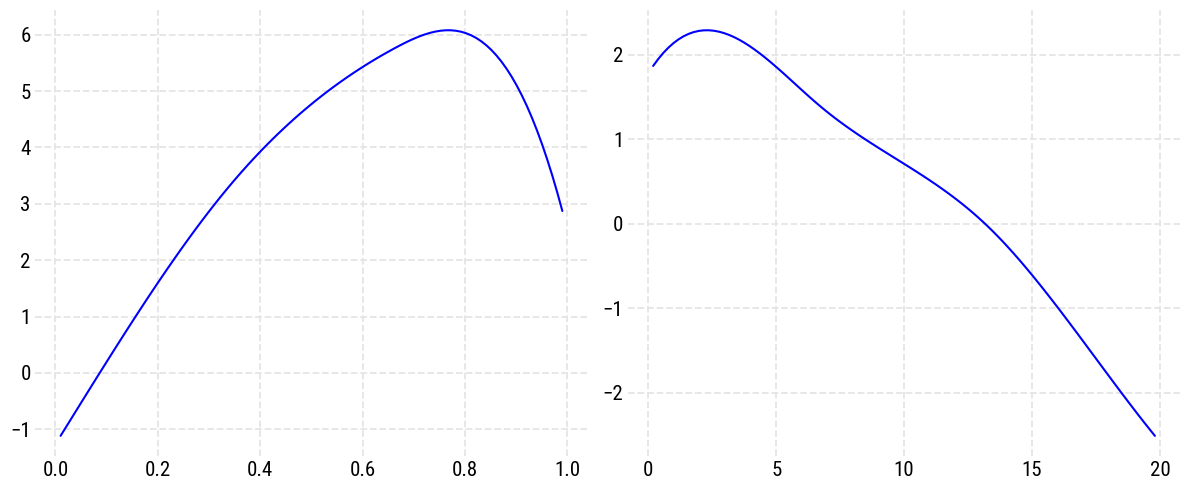

In [68]:
n_terms = 2

# Create subplots with one panel per term
fig, axs = plt.subplots(1, n_terms, figsize=(6 * n_terms, 5))

# Always work with a list of axes
if n_terms == 1:
    axs = [axs]

# For each term, generate grid, compute partial dependence, and plot
for i in range(n_terms):
    # Generate a grid specific to the i-th term (other features are held at median values)
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1)%X.shape[1]] = X[:, (i+1)%X.shape[1]].mean()
    XX[:, (i+2)%X.shape[1]] = X[:, (i+2)%X.shape[1]].mean()
    
    print(XX)
    
    pdep, confi = gam_int.partial_dependence(term=i, X=XX, width=0.95)

    ax = axs[i]
    ax.plot(XX[:, i], pdep, label='Partial Dependence', color='blue')
    #ax.fill_between(XX[:, i], confi[0], confi[1], color='lightblue', alpha=0.5, label='95% CI')
    # # ax.set_title(f'Partial Dependence for {feature_names[i]}')
    # # ax.set_xlabel(feature_names[i])
    # ax.set_ylabel('Effect')
    # ax.legend()

plt.tight_layout()
plt.show()

[[ 0.010132   10.         -8.        ]
 [ 0.02002966 10.         -8.        ]
 [ 0.02992731 10.         -8.        ]
 [ 0.03982497 10.         -8.        ]
 [ 0.04972263 10.         -8.        ]
 [ 0.05962028 10.         -8.        ]
 [ 0.06951794 10.         -8.        ]
 [ 0.0794156  10.         -8.        ]
 [ 0.08931325 10.         -8.        ]
 [ 0.09921091 10.         -8.        ]
 [ 0.10910857 10.         -8.        ]
 [ 0.11900622 10.         -8.        ]
 [ 0.12890388 10.         -8.        ]
 [ 0.13880154 10.         -8.        ]
 [ 0.14869919 10.         -8.        ]
 [ 0.15859685 10.         -8.        ]
 [ 0.16849451 10.         -8.        ]
 [ 0.17839216 10.         -8.        ]
 [ 0.18828982 10.         -8.        ]
 [ 0.19818747 10.         -8.        ]
 [ 0.20808513 10.         -8.        ]
 [ 0.21798279 10.         -8.        ]
 [ 0.22788044 10.         -8.        ]
 [ 0.2377781  10.         -8.        ]
 [ 0.24767576 10.         -8.        ]
 [ 0.25757341 10.        

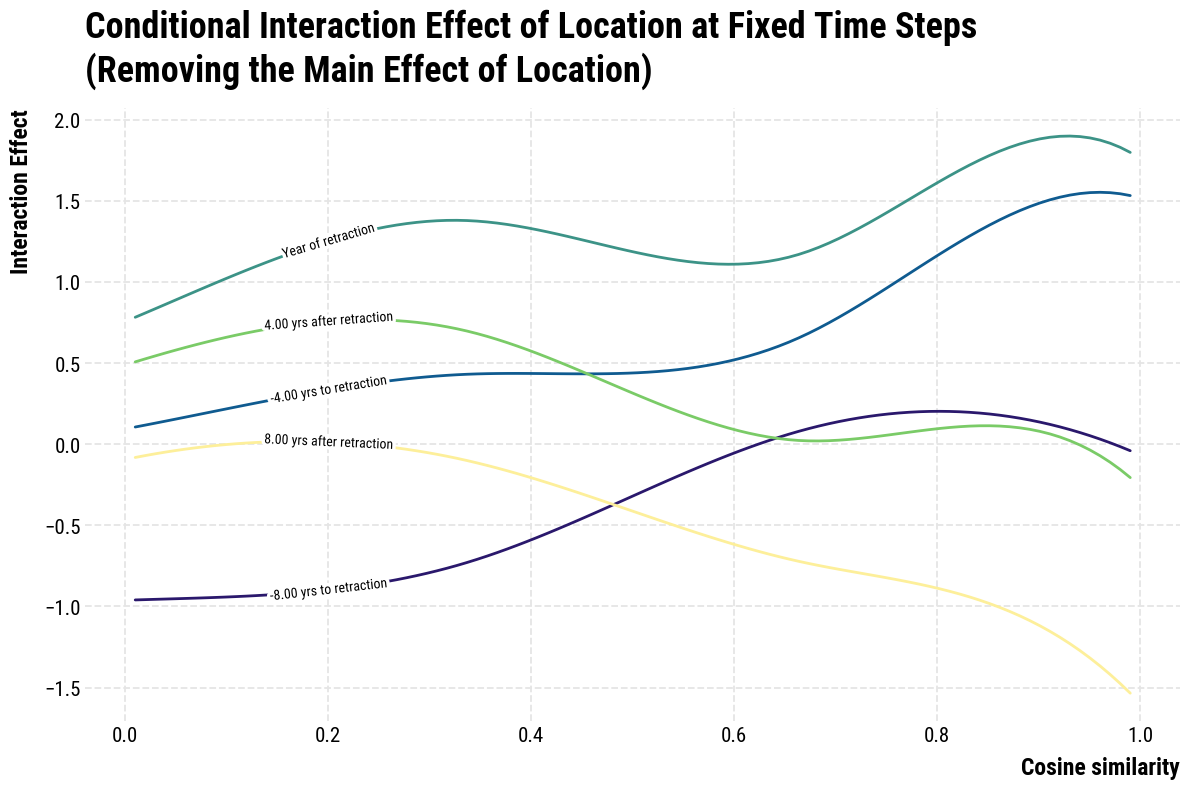

In [69]:
from labellines import labelLine, labelLines

# Divide the full time range into 10 fixed time points.
fixed_time_values = np.linspace(-8,8,5)
# Create a grid for the location parameter.
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
new_citation_age = np.ones(len(new_location)) * 10 # modeling citation age as 5 years

plt.figure(figsize=(12, 8))
# Use a colormap to assign a unique color for each fixed time value.
colors = cmaps.haline(np.linspace(0, 1, len(fixed_time_values)))

lines = []
for i, ft in enumerate(fixed_time_values):
    # For each fixed time value, create a grid where time is fixed at ft.
    X_fixed = np.column_stack([new_location, new_citation_age, np.full(new_location.shape, ft)])
    print(X_fixed)
    # Get the partial dependence of the interaction (tensor) term, which is term index 2.
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    
    if ft == 0:
        line = plt.plot(new_location, interaction_effect, label=f"Year of retraction", color=colors[i], linewidth=2)[0]
        labelLines([line], xvals=(0.2,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)
    elif ft < 0:
        line = plt.plot(new_location, interaction_effect, label=f"{ft:.2f} yrs to retraction", color=colors[i], linewidth=2)[0]
        labelLines([line], xvals=(0.2,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)
    elif ft > 0:
        line = plt.plot(new_location, interaction_effect, label=f"{ft:.2f} yrs after retraction", color=colors[i], linewidth=2)[0]
        labelLines([line], xvals=(0.2,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)

    
   # plt.fill_between(new_location, confi[0], confi[1], color=colors[i], alpha=0.3)

plt.xlabel("Cosine similarity")
plt.ylabel("Interaction Effect")
plt.title("Conditional Interaction Effect of Location at Fixed Time Steps\n(Removing the Main Effect of Location)")

# Add labels directly on the lines
labelLines(lines, align=False, xvals=0.5)

plt.tight_layout()
plt.show()

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/1747501716.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


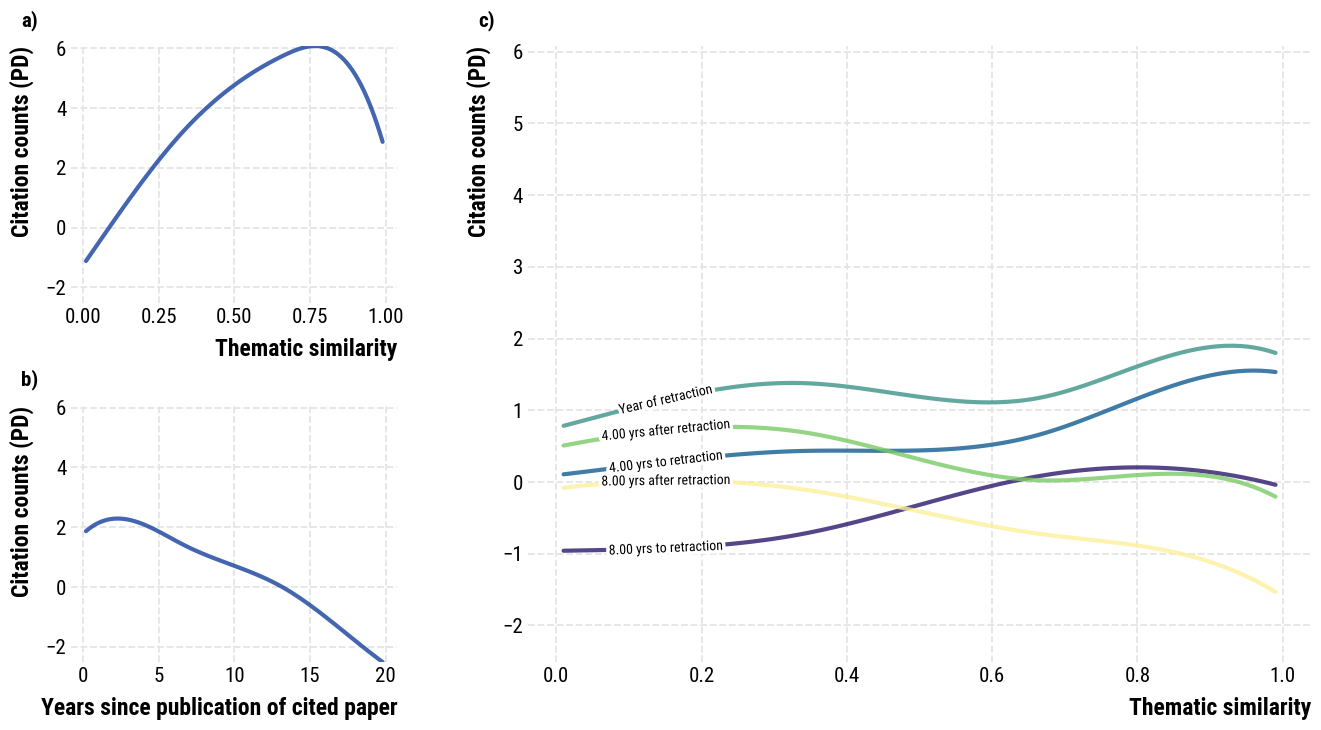

In [70]:
from labellines import labelLine, labelLines

# Create figure with 2x2 grid, where right column spans both rows
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.4)  # Added hspace and wspace parameters
ax1 = fig.add_subplot(gs[0, 0])  # Top left 
ax2 = fig.add_subplot(gs[1, 0])  # Bottom left
ax3 = fig.add_subplot(gs[:, 1:])  # Right side, full height, spanning 2 columns

for ax, label in zip((ax1, ax2, ax3), ('a)', 'b)', 'c)')):
  
    ax.annotate(label, xy=(-50, 20 + ax.bbox.height), xycoords="axes pixels", fontsize=15, weight = 'bold')

    
# First plot (top left)
n_terms = 2
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1)%X.shape[1]] = X[:, (i+1)%X.shape[1]].mean()
    XX[:, (i+2)%X.shape[1]] = X[:, (i+2)%X.shape[1]].mean()
    
    pdep, confi = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    
    if i == 0:
        ax1.plot(XX[:, i], pdep, label='Partial Dependence', color='#15409c', linewidth=3,alpha=.8)
        ax1.set_xlabel('Thematic similarity')
        ax1.set_ylabel('Citation counts (PD)')
    else:
        ax2.plot(XX[:, i], pdep, label='Partial Dependence', color='#15409c', linewidth=3,alpha=.8)
        ax2.set_xlabel('Years since publication of cited paper')
        ax2.set_ylabel('Citation counts (PD)')

# Get y-axis limits from all data to standardize
y_data = []
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1)%X.shape[1]] = X[:, (i+1)%X.shape[1]].mean()
    XX[:, (i+2)%X.shape[1]] = X[:, (i+2)%X.shape[1]].mean()
    pdep, _ = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    y_data.extend(pdep)

y_min, y_max = min(y_data), max(y_data)

# Main plot (right side)
fixed_time_values = np.linspace(-8,8,5)
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
new_citation_age = np.ones(len(new_location)) * 10

colors = cmaps.haline(np.linspace(0, 1, len(fixed_time_values)))
lines = []

label_x = 0.15

for i, ft in enumerate(fixed_time_values):
    X_fixed = np.column_stack([new_location, new_citation_age, np.full(new_location.shape, ft)])
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    
    if ft == 0:
        line = ax3.plot(new_location, interaction_effect, label=f"Year of retraction", color=colors[i], linewidth=3,alpha=.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)
    elif ft < 0:
        line = ax3.plot(new_location, interaction_effect, label=f"{abs(ft):.2f} yrs to retraction", color=colors[i], linewidth=3,alpha=.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)
    elif ft > 0:
        line = ax3.plot(new_location, interaction_effect, label=f"{ft:.2f} yrs after retraction", color=colors[i], linewidth=3,alpha=.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)

ax3.set_xlabel("Thematic similarity")
ax3.set_ylabel("Citation counts (PD)")
#ax3.set_ylabel("Pt. Dep. of Interaction Effect with years to retraction")
#ax3.set_title("Interaction Effect of Thematic Similarity with years to retraction")

# Set same y-axis limits for all plots
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
ax3.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

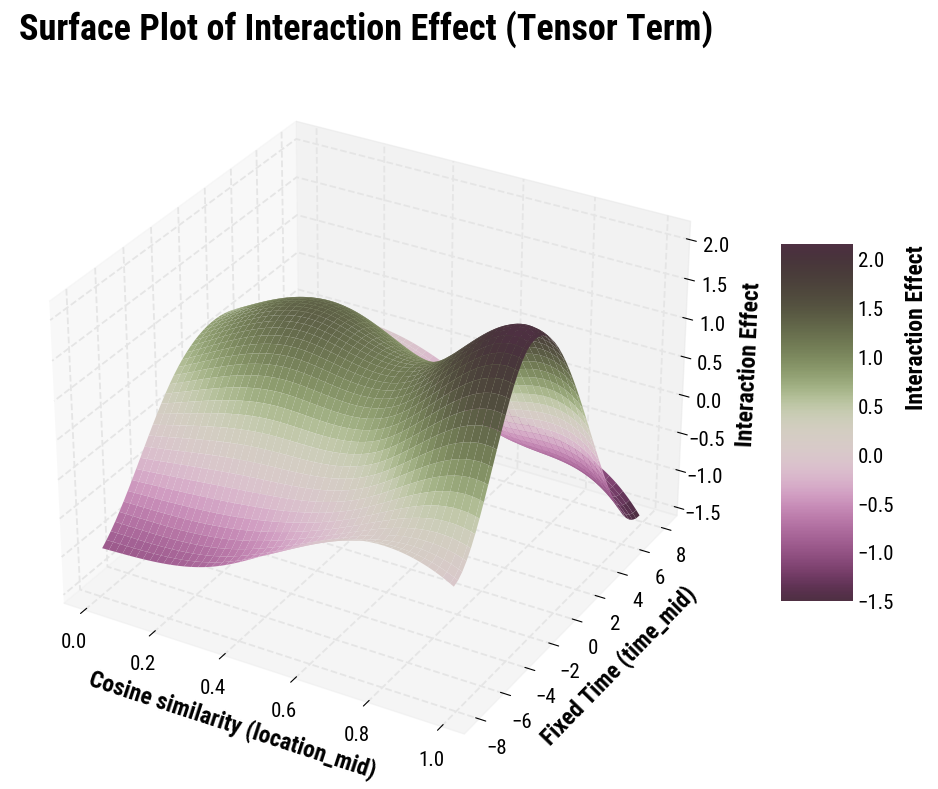

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Provides 3D plotting
# Ensure the colormap library is imported if not already:
import colormaps as cmaps

# Create a finer grid along the two interaction dimensions:
# - 'location_mid' corresponds to cosine similarity.
# - 'time_mid' corresponds to the fixed time axis.
loc_vals = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
time_vals = np.linspace(-8, 8, 50)  # Adjust the number of points as needed for smoothness
citation_age_val = 10 # Hold citation age fixed at 5 years

# Create a meshgrid from 'loc_vals' and 'time_vals'
L, T = np.meshgrid(loc_vals, time_vals)

# Build the design matrix X for our grid.
# Columns are: [location_mid, citation_age_mid, time_mid].
# We supply a constant citation age, as the interaction term involves columns 0 and 2.
X_new = np.column_stack([L.flatten(), 
                         np.full(L.flatten().shape, citation_age_val), 
                         T.flatten()])

# Evaluate the partial dependence for the interaction term (tensor, term index 2)
# Note: The function returns both the effect and the confidence interval.
surface_effect, confi = gam_int.partial_dependence(term=2, X=X_new, width=0.95)
Z = surface_effect.reshape(L.shape)  # Reshape back into grid shape

# Now create a 3D surface plot of the interaction effect.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(L, T, Z, cmap=cmaps.bamo, edgecolor='none')
ax.set_xlabel("Cosine similarity (location_mid)")
ax.set_ylabel("Fixed Time (time_mid)")
ax.set_zlabel("Interaction Effect")
ax.set_title("Surface Plot of Interaction Effect (Tensor Term)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="Interaction Effect")
plt.tight_layout()
plt.show()

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/3828413134.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


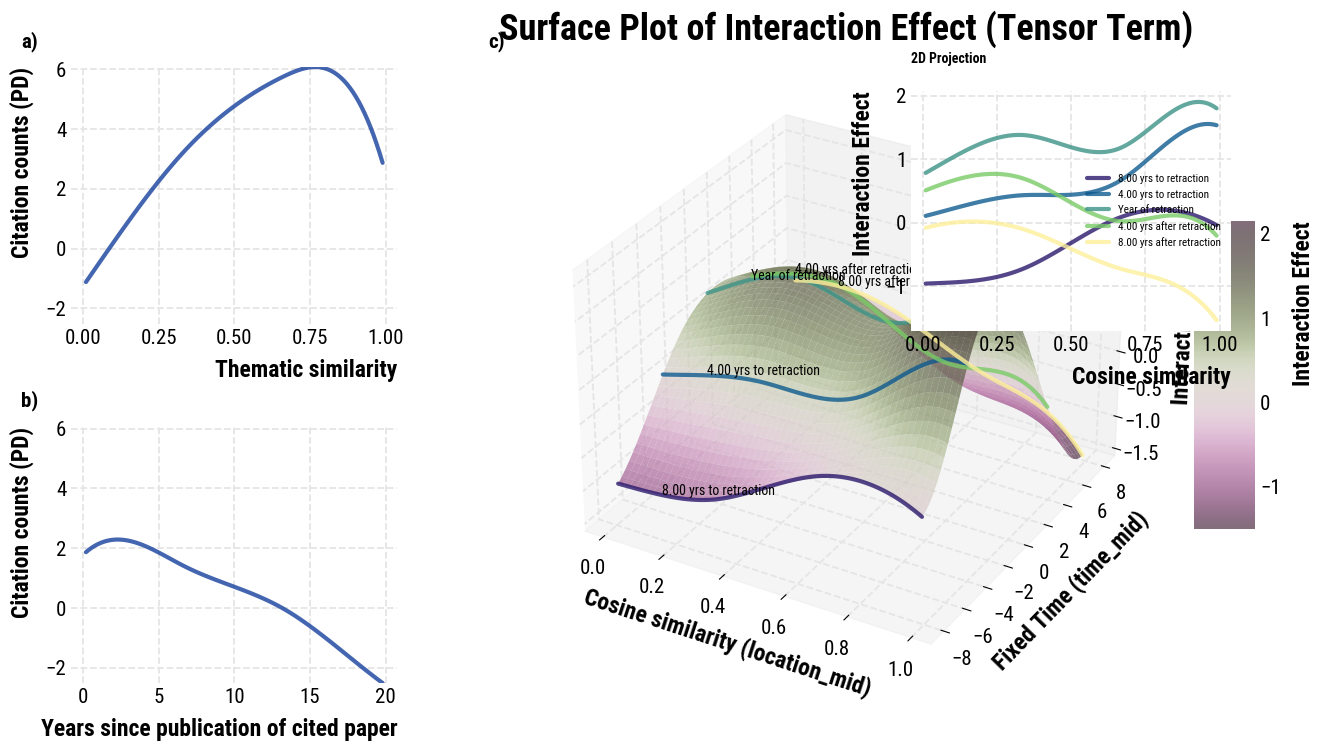

In [73]:
from labellines import labelLine, labelLines
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
import colormaps as cmaps

# -------------------------------
# Composite Figure Setup
# -------------------------------
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(gs[0, 0])  # Top left 2D plot
ax2 = fig.add_subplot(gs[1, 0])  # Bottom left 2D plot
# Right panel is now a 3D subplot:
ax3 = fig.add_subplot(gs[:, 1:], projection='3d')

# Annotate subplots
for ax, lab in zip((ax1, ax2, ax3), ('a)', 'b)', 'c)')):
    ax.annotate(lab, xy=(-50, 20 + ax.bbox.height), xycoords="axes pixels", fontsize=15, weight='bold')

# -------------------------------
# Left Panels: Partial Dependence Plots for Two Terms
# -------------------------------
n_terms = 2
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1) % X.shape[1]] = X[:, (i+1) % X.shape[1]].mean()
    XX[:, (i+2) % X.shape[1]] = X[:, (i+2) % X.shape[1]].mean()
    
    pdep, confi = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    
    if i == 0:
        ax1.plot(XX[:, i], pdep, label='Partial Dependence', color='#15409c', linewidth=3, alpha=0.8)
        ax1.set_xlabel('Thematic similarity')
        ax1.set_ylabel('Citation counts (PD)')
    else:
        ax2.plot(XX[:, i], pdep, label='Partial Dependence', color='#15409c', linewidth=3, alpha=0.8)
        ax2.set_xlabel('Years since publication of cited paper')
        ax2.set_ylabel('Citation counts (PD)')

# Standardize y-axis limits on left panels
y_data = []
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1) % X.shape[1]] = X[:, (i+1) % X.shape[1]].mean()
    XX[:, (i+2) % X.shape[1]] = X[:, (i+2) % X.shape[1]].mean()
    pdep, _ = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    y_data.extend(pdep)
y_min, y_max = min(y_data), max(y_data)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# -------------------------------
# Right Panel: 3D Surface Plot with Overlayed Lines
# -------------------------------
# Create a grid for the 3D surface.
loc_vals = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
time_vals = np.linspace(-8, 8, 50)
citation_age_val = 10  # Fixed citation age
L, T = np.meshgrid(loc_vals, time_vals)
X_new = np.column_stack([L.flatten(), np.full(L.flatten().shape, citation_age_val), T.flatten()])

# Compute the interaction effect over the grid
surface_effect, confi = gam_int.partial_dependence(term=2, X=X_new, width=0.95)
Z = surface_effect.reshape(L.shape)

# Plot the 3D surface
surf = ax3.plot_surface(L, T, Z, cmap=cmaps.bamo, edgecolor='none', alpha=0.7)
ax3.set_xlabel("Cosine similarity (location_mid)")
ax3.set_ylabel("Fixed Time (time_mid)")
ax3.set_zlabel("Interaction Effect")
ax3.set_title("Surface Plot of Interaction Effect (Tensor Term)")
fig.colorbar(surf, ax=ax3, shrink=0.5, aspect=5, label="Interaction Effect")

# Overlay the fixed-time lines (as in the original right plot)
fixed_time_values = np.linspace(-8, 8, 5)
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
colors = cmaps.haline(np.linspace(0, 1, len(fixed_time_values)))

for i, ft in enumerate(fixed_time_values):
    # Prepare data for each fixed time line.
    X_fixed = np.column_stack([new_location,
                               np.full(new_location.shape, citation_age_val),
                               np.full(new_location.shape, ft)])
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    # Plot the 3D line: x = location, y = constant fixed time, z = effect
    ax3.plot(new_location, np.full(new_location.shape, ft), interaction_effect,
             color=colors[i], linewidth=3, alpha=0.8)
    # Label the line at an index (e.g., index 15)
    label_index = 15
    if ft == 0:
        label_text = "Year of retraction"
    elif ft < 0:
        label_text = f"{abs(ft):.2f} yrs to retraction"
    else:
        label_text = f"{ft:.2f} yrs after retraction"
    ax3.text(new_location[label_index], ft, interaction_effect[label_index],
             label_text, color='black', fontsize=10)

# -------------------------------
# Add an Inset: 2D Projection of the Original Right Plot
# -------------------------------
# This inset shows the 3D surface “from the front”, i.e. the original view.
# The coordinates here ([left, bottom, width, height]) are in figure fractions and may be adjusted.
ax_inset = fig.add_axes([0.65, 0.55, 0.2, 0.3])
for i, ft in enumerate(fixed_time_values):
    X_fixed = np.column_stack([new_location,
                               np.full(new_location.shape, citation_age_val),
                               np.full(new_location.shape, ft)])
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    if ft == 0:
        label_text = "Year of retraction"
    elif ft < 0:
        label_text = f"{abs(ft):.2f} yrs to retraction"
    else:
        label_text = f"{ft:.2f} yrs after retraction"
    ax_inset.plot(new_location, interaction_effect, label=label_text,
                  color=colors[i], linewidth=3, alpha=0.8)
ax_inset.set_xlabel("Cosine similarity")
ax_inset.set_ylabel("Interaction Effect")
ax_inset.set_title("2D Projection", fontsize=10)
ax_inset.legend(fontsize=8)

plt.tight_layout()
plt.show()

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/2655635469.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()# Adjust layout and save


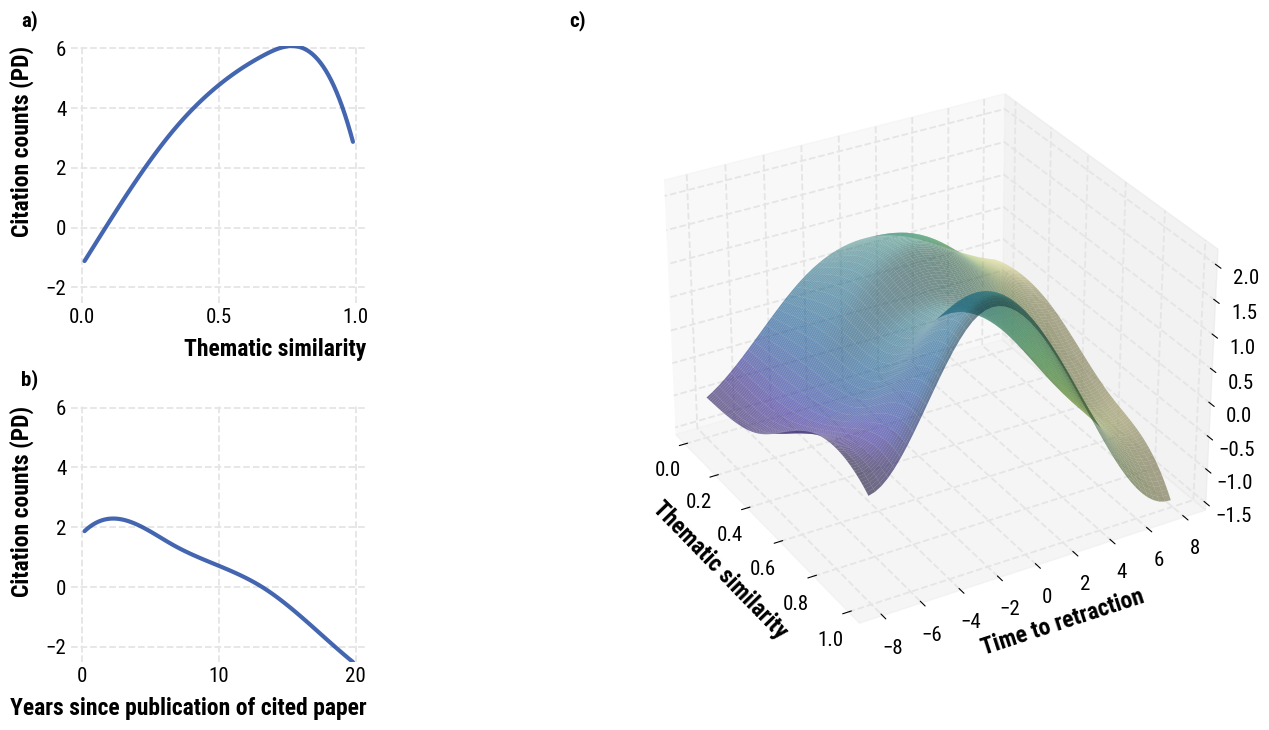

In [98]:
from labellines import labelLine, labelLines
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting support
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import colormaps as cmaps
from scipy.interpolate import RegularGridInterpolator

# -------------------------------
# Composite Figure Setup
# -------------------------------
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.6) # Increased wspace to make room for y-axis label
ax1 = fig.add_subplot(gs[0, 0])  # Top left 2D plot
ax2 = fig.add_subplot(gs[1, 0])  # Bottom left 2D plot
# Right panel: 3D subplot
ax3 = fig.add_subplot(gs[:, 1:], projection='3d')

# Annotate subplots
for ax, lab in zip((ax1, ax2, ax3), ('a)', 'b)', 'c)')):
    ax.annotate(lab, xy=(-50, 20 + ax.bbox.height), xycoords="axes pixels", fontsize=15, weight='bold')

# -------------------------------
# Left Panels: 2D Partial Dependence Plots for Two Terms
# -------------------------------
n_terms = 2
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1) % X.shape[1]] = X[:, (i+1) % X.shape[1]].mean()
    XX[:, (i+2) % X.shape[1]] = X[:, (i+2) % X.shape[1]].mean()
    
    pdep, confi = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    
    if i == 0:
        ax1.plot(XX[:, i], pdep, label='Partial Dependence', color='#15409c', linewidth=3, alpha=0.8)
        ax1.set_xlabel('Thematic similarity')
        ax1.set_ylabel('Citation counts (PD)')
    else:
        ax2.plot(XX[:, i], pdep, label='Partial Dependence', color='#15409c', linewidth=3, alpha=0.8)
        ax2.set_xlabel('Years since publication of cited paper')
        ax2.set_ylabel('Citation counts (PD)')

# Standardize y-axis limits on left panels
y_data = []
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1) % X.shape[1]] = X[:, (i+1) % X.shape[1]].mean()
    XX[:, (i+2) % X.shape[1]] = X[:, (i+2) % X.shape[1]].mean()
    pdep, _ = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    y_data.extend(pdep)
y_min, y_max = min(y_data), max(y_data)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# -------------------------------
# Right Panel: 3D Surface Plot with Fixed-Time Lines
# -------------------------------
# Create a grid for the 3D surface.
loc_vals = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
time_vals = np.linspace(-8, 8, 50)
citation_age_val = 10  # Fixed citation age
L, T = np.meshgrid(loc_vals, time_vals)
X_new = np.column_stack([L.flatten(),
                         np.full(L.flatten().shape, citation_age_val),
                         T.flatten()])

# Compute the surface effect for the interaction term.
surface_effect, confi = gam_int.partial_dependence(term=2, X=X_new, width=0.95)
Z = surface_effect.reshape(L.shape)

# Color the surface along the time axis.
# Normalize T to [0,1] and use cmaps.haline so that the surface colors match the fixed-time lines.
normT = (T - time_vals.min()) / (time_vals.max() - time_vals.min())
facecolors = cmaps.haline(normT)

# Plot the 3D surface without a color bar.
surf = ax3.plot_surface(L, T, Z, facecolors=facecolors, edgecolor='none', alpha=0.6, lw=0.5, rstride=1, cstride=1)

# Slightly rotate the 3D view (clockwise rotation).
ax3.view_init(elev=30, azim=-30)
ax3.set_xlabel("Thematic similarity")
ax3.set_ylabel("Time to retraction")
ax3.set_zlabel("Citation counts (PD)", labelpad=15) # Added labelpad to prevent label cutoff

plt.tight_layout()# Adjust layout and save
plt.savefig('images/overview_plot_with_tight_layout.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
plt.show()

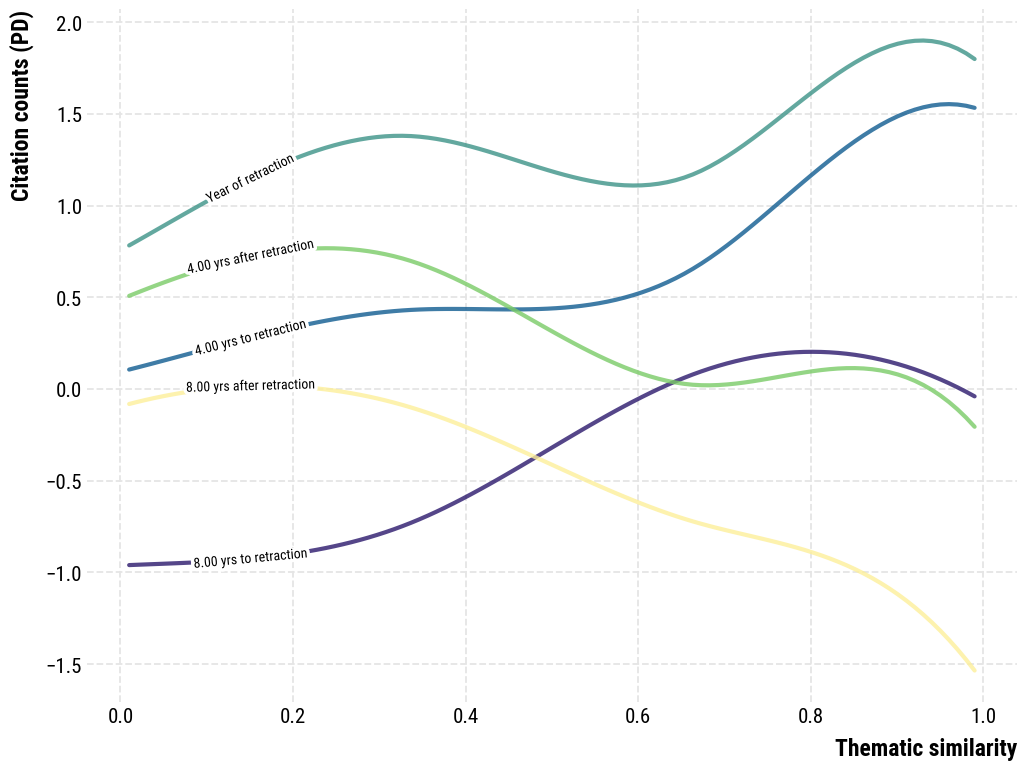

In [95]:
# Create figure with white background and 1:2 aspect ratio
plt.figure(figsize=(12,9), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Main plot
fixed_time_values = np.linspace(-8,8,5)
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
new_citation_age = np.ones(len(new_location)) * 10

colors = cmaps.haline(np.linspace(0, 1, len(fixed_time_values)))
lines = []

label_x = 0.15

for i, ft in enumerate(fixed_time_values):
    X_fixed = np.column_stack([new_location, new_citation_age, np.full(new_location.shape, ft)])
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    
    if ft == 0:
        line = plt.plot(new_location, interaction_effect, label=f"Year of retraction", color=colors[i], linewidth=3,alpha=.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)
    elif ft < 0:
        line = plt.plot(new_location, interaction_effect, label=f"{abs(ft):.2f} yrs to retraction", color=colors[i], linewidth=3,alpha=.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)
    elif ft > 0:
        line = plt.plot(new_location, interaction_effect, label=f"{ft:.2f} yrs after retraction", color=colors[i], linewidth=3,alpha=.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True, color='black', fontsize=10, alpha=1.)

plt.xlabel("Thematic similarity")
plt.ylabel("Citation counts (PD)")

# Save the plot with white background, tight layout and 300 dpi
plt.savefig('images/interaction_effect_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()



/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_97633/2959024513.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


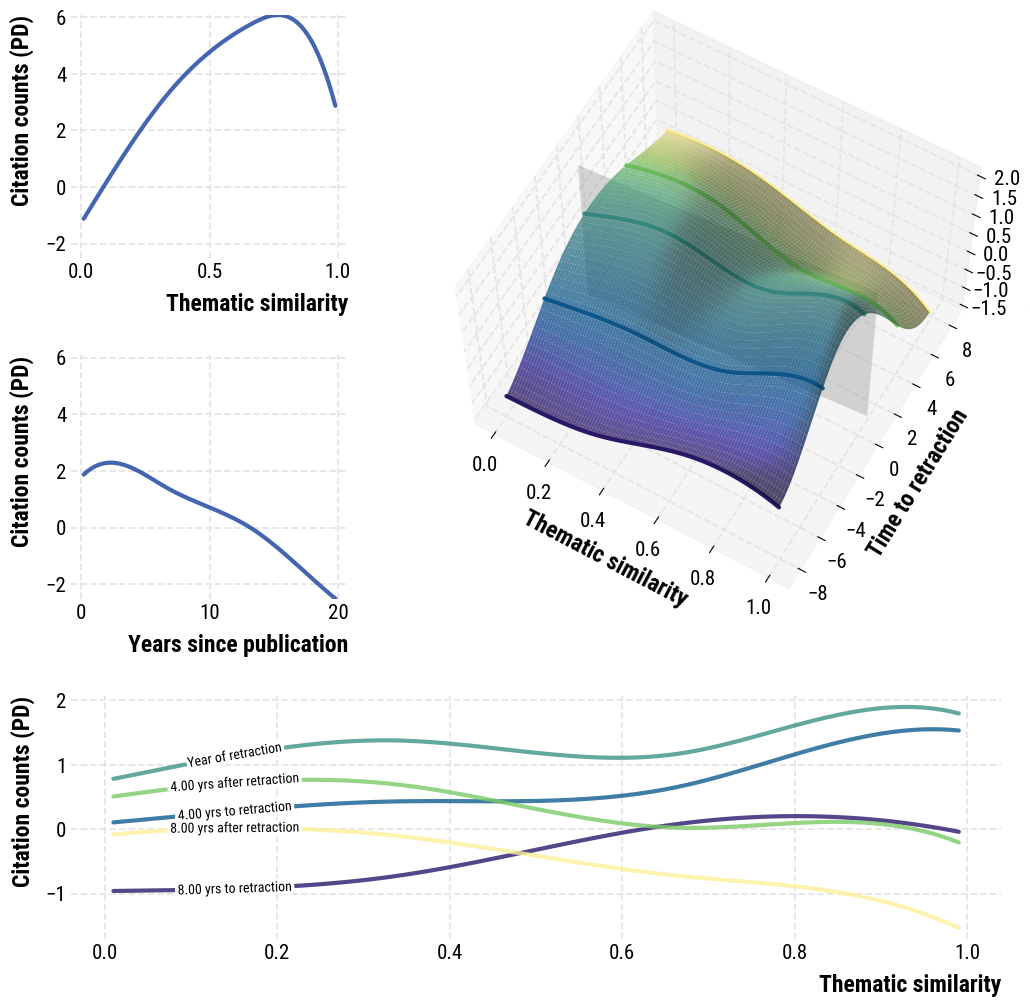

In [112]:
from labellines import labelLine, labelLines
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting support
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import colormaps as cmaps
from scipy.interpolate import RegularGridInterpolator

# -------------------------------
# Composite Figure Setup: 3 x 3 Grid
# -------------------------------
fig = plt.figure(figsize=(12, 12))
# Create a grid with 3 rows and 3 columns
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3, width_ratios=[1, 0.9, 0.9])

# Assign axes according to the new layout:
# x1: Top-left cell (row 0, col 0) – Partial dependence (term 0)
ax1 = fig.add_subplot(gs[0, 0])
# x2: Middle-left cell (row 1, col 0) – Partial dependence (term 1)
ax2 = fig.add_subplot(gs[1, 0])
# x4: Right block spanning top 2 rows (rows 0-1, cols 1-2) – 3D surface plot
ax4 = fig.add_subplot(gs[0:2, 1:3], projection='3d')
# x3: Entire bottom row (row 2, all columns) – Interaction effect plot
ax3 = fig.add_subplot(gs[2, :])

# Annotate axes with labels for clarity
ax1.annotate("x1", xy=(-40, 30), fontsize=15, weight='bold')
ax2.annotate("x2", xy=(-40, 30), fontsize=15, weight='bold')
ax4.annotate("x4", xy=(-40, 30), fontsize=15, weight='bold')
ax3.annotate("x3", xy=(-40, 30), fontsize=15, weight='bold')

# -------------------------------
# x1 and x2: 2D Partial Dependence Plots for Two Terms
# -------------------------------
n_terms = 2
for i, ax in zip(range(n_terms), [ax1, ax2]):
    # Build a design matrix with variation only in the current term
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1) % X.shape[1]] = X[:, (i+1) % X.shape[1]].mean()
    XX[:, (i+2) % X.shape[1]] = X[:, (i+2) % X.shape[1]].mean()
    
    pdep, confi = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    
    ax.plot(XX[:, i], pdep, color='#15409c', linewidth=3, alpha=0.8)
    if i == 0:
        ax.set_xlabel('Thematic similarity')
        ax.set_ylabel('Citation counts (PD)')
    else:
        ax.set_xlabel('Years since publication')
        ax.set_ylabel('Citation counts (PD)')

# Standardize y-axis limits for x1 and x2
y_data = []
for i in range(n_terms):
    XX = np.zeros((100, X.shape[1]))
    XX[:, i] = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    XX[:, (i+1) % X.shape[1]] = X[:, (i+1) % X.shape[1]].mean()
    XX[:, (i+2) % X.shape[1]] = X[:, (i+2) % X.shape[1]].mean()
    pdep, _ = gam_int.partial_dependence(term=i, X=XX, width=0.95)
    y_data.extend(pdep)
y_min, y_max = min(y_data), max(y_data)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# -------------------------------
# x4: 3D Surface Plot with Fixed-Time Lines
# -------------------------------
loc_vals = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
time_vals = np.linspace(-8, 8, 50)
citation_age_val = 10  # Fixed citation age
L, T = np.meshgrid(loc_vals, time_vals)
X_new = np.column_stack([
    L.flatten(),
    np.full(L.flatten().shape, citation_age_val),
    T.flatten()
])
surface_effect, confi = gam_int.partial_dependence(term=2, X=X_new, width=0.95)
Z = surface_effect.reshape(L.shape)

# Color the surface along the time axis.
normT = (T - time_vals.min()) / (time_vals.max() - time_vals.min())
facecolors = cmaps.haline(normT)

surf = ax4.plot_surface(L, T, Z, facecolors=facecolors, edgecolor='none',
                        alpha=0.75, lw=0.5, rstride=1, cstride=1)
ax4.view_init(elev=60, azim=-60)
ax4.set_xlabel("Thematic similarity")
ax4.set_ylabel("Time to retraction")
ax4.set_zlabel("Citation counts (PD)", labelpad=15)

# -------------------------------
# Define variables for fixed-time lines (used in both x4 and x3)
# -------------------------------
fixed_time_values = np.linspace(-8, 8, 5)
new_location = np.linspace(aggregated['location_mid'].min(), aggregated['location_mid'].max(), 100)
new_citation_age = np.ones(len(new_location)) * 10
colors = cmaps.haline(np.linspace(0, 1, len(fixed_time_values)))

# Add colored lines into the 3D plot corresponding to the bottom plot lines.
for i, ft in enumerate(fixed_time_values):
    X_fixed = np.column_stack([
        new_location,
        new_citation_age,
        np.full(new_location.shape, ft)
    ])
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    # Plot in 3D: x is new_location, y is fixed ft, and z is the computed interaction effect.
    ax4.plot(new_location, np.full_like(new_location, ft), interaction_effect,
             color=colors[i], linewidth=3, alpha=1)
# -------------------------------
# Add a Transparent 3D Rectangle to ax4
# -------------------------------
# Define vertices of the rectangle: constant x = -8, y from 0 to 1, z from -1.5 to 2
rect_verts = [[(0, 0, -1.5), (0, 0, 2), (1, 1, 2), (1, 1, -1.5)]]
rect = Poly3DCollection(rect_verts, facecolor='grey', alpha=0.3)
ax4.add_collection3d(rect)
# -------------------------------
# x3: Interaction Effect Plot (spanning entire bottom row)
# -------------------------------
label_x = 0.15  # x position for label placement
for i, ft in enumerate(fixed_time_values):
    X_fixed = np.column_stack([
        new_location,
        new_citation_age,
        np.full(new_location.shape, ft)
    ])
    interaction_effect, confi = gam_int.partial_dependence(term=2, X=X_fixed, width=0.95)
    
    if ft == 0:
        line = ax3.plot(new_location, interaction_effect, label="Year of retraction",
                        color=colors[i], linewidth=3, alpha=0.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True,
                   color='black', fontsize=10, alpha=1.)
    elif ft < 0:
        line = ax3.plot(new_location, interaction_effect, label=f"{abs(ft):.2f} yrs to retraction",
                        color=colors[i], linewidth=3, alpha=0.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True,
                   color='black', fontsize=10, alpha=1.)
    else:
        line = ax3.plot(new_location, interaction_effect, label=f"{ft:.2f} yrs after retraction",
                        color=colors[i], linewidth=3, alpha=0.8)[0]
        labelLines([line], xvals=(label_x,), zorder=2.5, align=True,
                   color='black', fontsize=10, alpha=1.)
ax3.set_xlabel("Thematic similarity")
ax3.set_ylabel("Citation counts (PD)")

# -------------------------------
# Final Adjustments and Save
# -------------------------------
plt.tight_layout()
plt.savefig('images/overview_plot_with_tight_layout.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [72]:
aggregated

,time_bin,location_bin,citation_age_bin,count,time_mid,location_mid,citation_age_mid
0,"(-8.016, -7.68]","(-0.000336, 0.0206]","(-0.02, 0.4]",0,-7.848,0.010132,0.19
1,"(-8.016, -7.68]","(-0.000336, 0.0206]","(0.4, 0.8]",0,-7.848,0.010132,0.60
2,"(-8.016, -7.68]","(-0.000336, 0.0206]","(0.8, 1.2]",0,-7.848,0.010132,1.00
3,"(-8.016, -7.68]","(-0.000336, 0.0206]","(1.2, 1.6]",0,-7.848,0.010132,1.40
4,"(-8.016, -7.68]","(-0.000336, 0.0206]","(1.6, 2.0]",0,-7.848,0.010132,1.80
...,...,...,...,...,...,...,...
124995,"(7.68, 8.0]","(0.98, 1.0]","(18.0, 18.4]",0,7.840,0.990000,18.20
124996,"(7.68, 8.0]","(0.98, 1.0]","(18.4, 18.8]",0,7.840,0.990000,18.60
124997,"(7.68, 8.0]","(0.98, 1.0]","(18.8, 19.2]",0,7.840,0.990000,19.00
124998,"(7.68, 8.0]","(0.98, 1.0]","(19.2, 19.6]",0,7.840,0.990000,19.40


In [336]:
aggregated

,time_bin,location_bin,citation_age_bin,count,time_mid,location_mid,citation_age_mid
0,"(-8.016, -7.68]","(-0.000336, 0.0206]","(-0.02, 0.4]",0,-7.848,0.010132,0.19
1,"(-8.016, -7.68]","(-0.000336, 0.0206]","(0.4, 0.8]",0,-7.848,0.010132,0.60
2,"(-8.016, -7.68]","(-0.000336, 0.0206]","(0.8, 1.2]",0,-7.848,0.010132,1.00
3,"(-8.016, -7.68]","(-0.000336, 0.0206]","(1.2, 1.6]",0,-7.848,0.010132,1.40
4,"(-8.016, -7.68]","(-0.000336, 0.0206]","(1.6, 2.0]",0,-7.848,0.010132,1.80
...,...,...,...,...,...,...,...
124995,"(7.68, 8.0]","(0.98, 1.0]","(18.0, 18.4]",0,7.840,0.990000,18.20
124996,"(7.68, 8.0]","(0.98, 1.0]","(18.4, 18.8]",0,7.840,0.990000,18.60
124997,"(7.68, 8.0]","(0.98, 1.0]","(18.8, 19.2]",0,7.840,0.990000,19.00
124998,"(7.68, 8.0]","(0.98, 1.0]","(19.2, 19.6]",0,7.840,0.990000,19.40


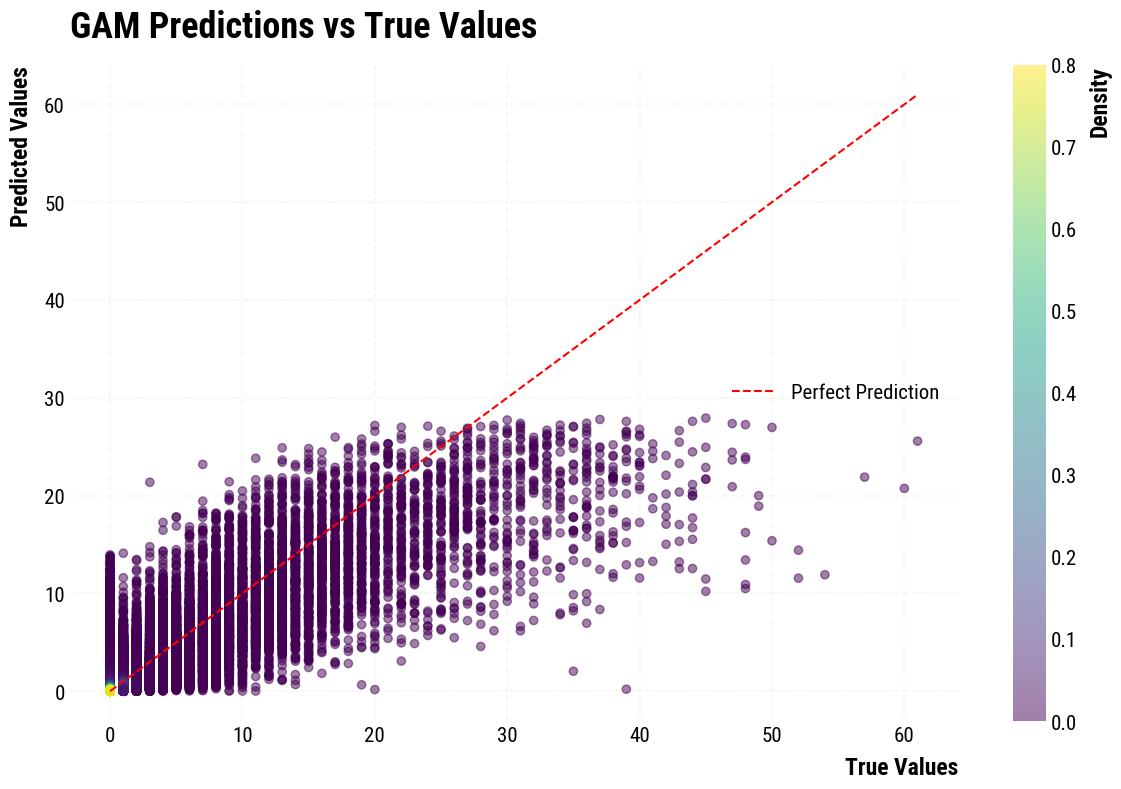

In [353]:
# Get predictions from the GAM model for the original data
predictions = gam_int.predict(aggregated[['location_mid', 'citation_age_mid', 'time_mid']])

# Create scatter plot comparing predictions vs actual counts
plt.figure(figsize=(12,8))

# Calculate gaussian KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(np.vstack([aggregated['count'], predictions]))

# Calculate density at each point
points = np.vstack([aggregated['count'], predictions])
density = kde(points)

# Create scatter plot colored by density
plt.scatter(aggregated['count'], predictions, c=density, cmap='viridis', alpha=0.5, vmin=0, vmax=0.8)
plt.colorbar(label='Density')

# Add a diagonal line representing perfect predictions
min_val = min(aggregated['count'].min(), predictions.min())
max_val = max(aggregated['count'].max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('GAM Predictions vs True Values')
plt.legend()

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


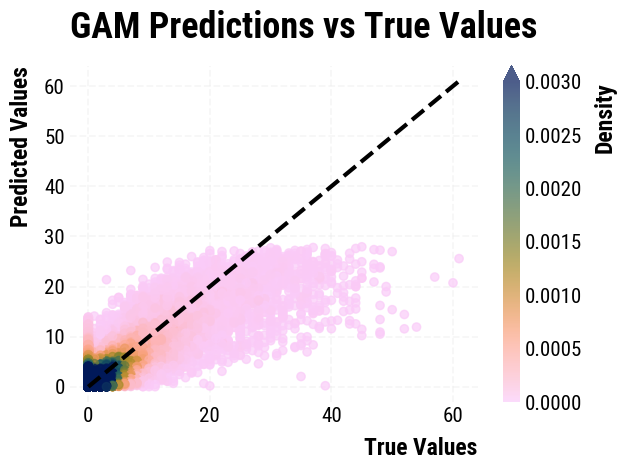

In [372]:
# Create scatter plot colored by density with log scales
scatter = plt.scatter(aggregated['count'], predictions, c=density, cmap=cmaps.batlow_r, alpha=.7, vmin=0, vmax=0.003)
cbar = plt.colorbar(scatter, label='Density', extend='max')

# Add a diagonal line representing perfect predictions
min_val = min(aggregated['count'].min(), predictions.min())
max_val = max(aggregated['count'].max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='black', label='Perfect Prediction',linewidth=3)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('GAM Predictions vs True Values')
#plt.legend()

# Set log scales
# plt.xscale('log')
# plt.yscale('log')

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
